# Capstone 3: Making Predictions on Depletion of Five Natural Resources

## EDA

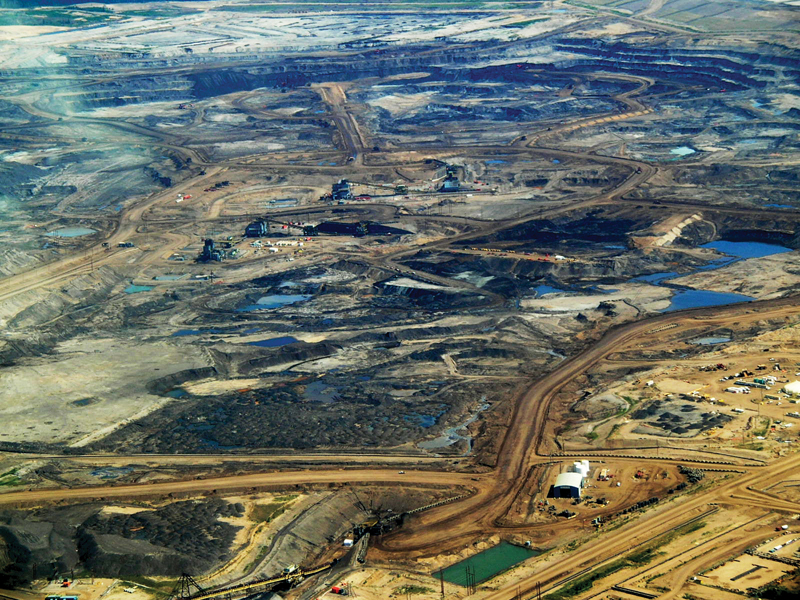

Environmentalism is defined as a concern about and action aimed at protecting the environment. The modern environmental movement started in late 19th century with concerns about protecting the rurals of Europe and the wilderness in the U.S., as well as the health consequences of pollution during the Industrial Revolution [Wikipedia](https://en.wikipedia.org/wiki/Environmentalism#:~:text=The%20movement%20in%20the%20United,Thoreau%20making%20key%20philosophical%20contributions.). Indeed, the Industrial Revolution provided the impetus for modernization. Historically, there have been four industrial revolutions: coal in 1765, gas in 1870, electronics and nuclear in 1969, and internet and renewable energy in 2000 [UpKeep](https://www.onupkeep.com/answers/maintenance-history/four-industrial-revolutions). Each of these revolutions caused great shifts in not only the job industry, lifestyles, and population growth, but impacted the environment tremendously.

This capstone project will discuss the direct and indirect effects of industrialization, modernization, and manufacturing on the availability and distribution of four essential natural resources: coal, oil, natural gas, fresh water, and phosphorus. The aim will be to provide predictive analytics for if and when these resources will be depleted. 

### Data Acquisition

**Sources:**

- https://data.un.org/
- https://www.eia.gov/outlooks/aeo/data/browser/
- https://edg.epa.gov/metadata/catalog/main/home.page
- https://sedac.ciesin.columbia.edu/data/sets/browse?facets=theme%3Aconservation
- https://marketplace.officialstatistics.org/
- https://www.kaggle.com/
- https://asb.opec.org/data/ASB_Data.php


### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats
import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

import re
import mailbox
import csv

In [2]:
#

### Population

One of the biggest concerns in the modern world that is paramount is overpopulation. It affects everything (and not in a good way). Here I'll take a dataset from UNdata that shows an updated data of world population, surface area, and density.

In [3]:
path = r'C:\Users\yuvem\OneDrive\Documents\GitHub\Personal-Capstone-Projects\Estimating when four natural resources will be depleted\Datasets\SYB63_1_202105_Population, Surface Area and Density.csv'
world_pop_data = pd.read_csv(path, header=1)
world_pop_data.head()

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2005,Population mid-year estimates (millions),6541.9070,NaN,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2005,Population mid-year estimates for males (milli...,3296.4853,NaN,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2005,Population mid-year estimates for females (mil...,3245.4217,NaN,"United Nations Population Division, New York, ..."
3,1,"Total, all countries or areas",2005,Sex ratio (males per 100 females),101.5734,NaN,"United Nations Population Division, New York, ..."
4,1,"Total, all countries or areas",2005,Population aged 0 to 14 years old (percentage),28.1425,NaN,"United Nations Population Division, New York, ..."


In [4]:
world_pop_data.rename({'Unnamed: 1':'Country'}, axis=1, inplace=True) # Rename 2nd column to 'Country'

In [5]:
world_pop_data.head()

,Region/Country/Area,Country,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2005,Population mid-year estimates (millions),6541.9070,NaN,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2005,Population mid-year estimates for males (milli...,3296.4853,NaN,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2005,Population mid-year estimates for females (mil...,3245.4217,NaN,"United Nations Population Division, New York, ..."
3,1,"Total, all countries or areas",2005,Sex ratio (males per 100 females),101.5734,NaN,"United Nations Population Division, New York, ..."
4,1,"Total, all countries or areas",2005,Population aged 0 to 14 years old (percentage),28.1425,NaN,"United Nations Population Division, New York, ..."


In [6]:
#world_pop_data['Region/Country/Area'].unique()
#world_pop_data['Footnotes'].unique()
# Just dropping the Region/Country/Area column, keeping the Footnotes for now

In [7]:
# Check
world_pop_data = world_pop_data.drop(columns='Region/Country/Area')
world_pop_data.head()

,Country,Year,Series,Value,Footnotes,Source
0,"Total, all countries or areas",2005,Population mid-year estimates (millions),6541.9070,NaN,"United Nations Population Division, New York, ..."
1,"Total, all countries or areas",2005,Population mid-year estimates for males (milli...,3296.4853,NaN,"United Nations Population Division, New York, ..."
2,"Total, all countries or areas",2005,Population mid-year estimates for females (mil...,3245.4217,NaN,"United Nations Population Division, New York, ..."
3,"Total, all countries or areas",2005,Sex ratio (males per 100 females),101.5734,NaN,"United Nations Population Division, New York, ..."
4,"Total, all countries or areas",2005,Population aged 0 to 14 years old (percentage),28.1425,NaN,"United Nations Population Division, New York, ..."


In [8]:
#world_pop_data['Series'].unique()
# going to make separate dataset later for each Series

In [9]:
world_pop_data.isnull().sum()/len(world_pop_data)

Country      0.000000
Year         0.000000
Series       0.000000
Value        0.000000
Footnotes    0.866957
Source       0.000000
dtype: float64

In [10]:
world_pop_data['Year'].unique()

array([2005, 2010, 2017, 2019, 2000, 2016, 2001, 2011, 2015, 2006, 2014,
       2012, 2008, 2009, 2007, 2004, 2002, 2013, 2003], dtype=int64)

In [11]:
#world_pop_data['Country'].unique()
world_pop_data['Source'].unique()

array(['United Nations Population Division, New York, World Population Prospects: The 2019 Revision, last accessed June 2019.',
       'United Nations Population Division, New York, World Population Prospects: The 2019 Revision; supplemented by data from the United Nations Statistics Division, New York, Demographic Yearbook 2015 and Secretariat for the Pacific Community (SPC) for small countries or areas, last accessed June 2019.',
       'United Nations Statistics Division, New York, "Demographic Yearbook 2015" and the demographic statistics database, last accessed June 2017.'],
      dtype=object)

So the 'Source' column is not necessary for our analysis; however, it's good to record where this data come from so I'll do that now. 

**World Population Data: Sources:**
- United Nations Population Division, New York, World Population Prospects: The 2019 Revision, last accessed June 2019.
- United Nations Population Division, New York, World Population Prospects: The 2019 Revision; supplemented by data from the United Nations Statistics Division, New York, Demographic Yearbook 2015 and Secretariat for the Pacific Community (SPC) for small countries or areas, last accessed June 2019.
- United Nations Statistics Division, New York, "Demographic Yearbook 2015" and the demographic statistics database, last accessed June 2017.

Looks like these were all accessed online.

In [12]:
world_pop_data = world_pop_data.drop(columns='Source')
#world_pop_data.head()

In [13]:
world_pop_data.dtypes

Country       object
Year           int64
Series        object
Value        float64
Footnotes     object
dtype: object

In [14]:
# Data type conversions

# Country
world_pop_data['Country'] = world_pop_data['Country'].astype(pd.StringDtype())

# Series
world_pop_data['Series'] = world_pop_data['Series'].astype(pd.StringDtype())

# Value
world_pop_data['Value'] = world_pop_data['Value'].round(2)

In [15]:
world_pop_data.dtypes

Country       string
Year           int64
Series        string
Value        float64
Footnotes     object
dtype: object

In [16]:
world_pop_data.head()

,Country,Year,Series,Value,Footnotes
0,"Total, all countries or areas",2005,Population mid-year estimates (millions),6541.91,NaN
1,"Total, all countries or areas",2005,Population mid-year estimates for males (milli...,3296.49,NaN
2,"Total, all countries or areas",2005,Population mid-year estimates for females (mil...,3245.42,NaN
3,"Total, all countries or areas",2005,Sex ratio (males per 100 females),101.57,NaN
4,"Total, all countries or areas",2005,Population aged 0 to 14 years old (percentage),28.14,NaN


#### Adding Continent Column

In [17]:
i = world_pop_data[((world_pop_data.Country == 'Total, all countries or areas'))].index # Find index for 'total, all countires or areas' so I can drop this
i

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
           dtype='int64')

In [18]:
world_pop_data[((world_pop_data.Country == 'Total, all countries or areas'))]

,Country,Year,Series,Value,Footnotes
0,"Total, all countries or areas",2005,Population mid-year estimates (millions),6541.91,NaN
1,"Total, all countries or areas",2005,Population mid-year estimates for males (milli...,3296.49,NaN
2,"Total, all countries or areas",2005,Population mid-year estimates for females (mil...,3245.42,NaN
3,"Total, all countries or areas",2005,Sex ratio (males per 100 females),101.57,NaN
4,"Total, all countries or areas",2005,Population aged 0 to 14 years old (percentage),28.14,NaN
5,"Total, all countries or areas",2005,Population aged 60+ years old (percentage),10.25,NaN
6,"Total, all countries or areas",2005,Population density,50.29,NaN
7,"Total, all countries or areas",2010,Population mid-year estimates (millions),6956.82,NaN
8,"Total, all countries or areas",2010,Population mid-year estimates for males (milli...,3507.70,NaN
9,"Total, all countries or areas",2010,Population mid-year estimates for females (mil...,3449.12,NaN


In [19]:
world_pop_data2 = world_pop_data.drop(i) # Set new variable for this

In [20]:
world_pop_data2.head()

,Country,Year,Series,Value,Footnotes
29,Africa,2005,Population mid-year estimates (millions),916.15,NaN
30,Africa,2005,Population mid-year estimates for males (milli...,456.65,NaN
31,Africa,2005,Population mid-year estimates for females (mil...,459.51,NaN
32,Africa,2005,Sex ratio (males per 100 females),99.38,NaN
33,Africa,2005,Population aged 0 to 14 years old (percentage),41.87,NaN


In [21]:
africa = world_pop_data2[((world_pop_data2.Country == 'Africa'))]

In [22]:
asia = world_pop_data2[((world_pop_data2.Country == 'Asia'))]

In [23]:
africa_asia = africa.append(asia, ignore_index=True)

In [24]:
southamerica = world_pop_data2[((world_pop_data2.Country == 'South America'))]

In [25]:
europe = world_pop_data2[((world_pop_data2.Country == 'Europe'))]

In [26]:
southamer_euro = southamerica.append(europe, ignore_index=True)

In [27]:
oceania = world_pop_data2[((world_pop_data2.Country == 'Oceania'))]

In [28]:
northamerica = world_pop_data2[((world_pop_data2.Country == 'Northern America'))]

In [29]:
first_four = africa_asia.append(southamer_euro, ignore_index=True)

In [30]:
centralamerica = world_pop_data2[((world_pop_data2.Country == 'Central America'))]

In [31]:
australianewzeal = world_pop_data2[((world_pop_data2.Country == 'Australia and New Zealand'))]

In [32]:
northamer_oceania = oceania.append(northamerica, ignore_index=True)

In [33]:
centralamer_ausnewz = centralamerica.append(australianewzeal, ignore_index=True)

In [34]:
second_four = northamer_oceania.append(centralamer_ausnewz, ignore_index=True)

In [35]:
world_pop_continents = first_four.append(second_four, ignore_index=True)

In [36]:
len(world_pop_continents)

232

In [37]:
world_pop_continents.head()

,Country,Year,Series,Value,Footnotes
0,Africa,2005,Population mid-year estimates (millions),916.15,NaN
1,Africa,2005,Population mid-year estimates for males (milli...,456.65,NaN
2,Africa,2005,Population mid-year estimates for females (mil...,459.51,NaN
3,Africa,2005,Sex ratio (males per 100 females),99.38,NaN
4,Africa,2005,Population aged 0 to 14 years old (percentage),41.87,NaN


#### Separate dataset: Country, Year, Value

In [38]:
country_year_val = world_pop_continents[['Country','Year','Value']]
country_year_val.head()

,Country,Year,Value
0,Africa,2005,916.15
1,Africa,2005,456.65
2,Africa,2005,459.51
3,Africa,2005,99.38
4,Africa,2005,41.87


In [39]:
# Convert Year to datetime
country_year_val['Year'] = pd.to_datetime(country_year_val.Year, format='%Y')

<ipython-input-39-7fd72f5aa4bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_year_val['Year'] = pd.to_datetime(country_year_val.Year, format='%Y')


In [40]:
# Check max and min values for 'Value' column
country_year_val.Value.max()

31915.0

In [41]:
country_year_val.Value.min()

3.06

In [42]:
len(country_year_val)

232

In [43]:
country_year_val.isnull().sum()/len(country_year_val)

Country    0.0
Year       0.0
Value      0.0
dtype: float64

In [44]:
# Making separate dataframe again
pivot_table = country_year_val.pivot_table(index=['Country', 'Year'])
pivot_table.head()

Value
Country Year                   
Africa  2005-01-01   287.081429
        2010-01-01   322.820000
        2017-01-01  4123.433750
        2019-01-01   400.871429
Asia    2005-01-01  1175.098571

In [45]:
pivot_table.dropna()

Value
Country                   Year                   
Africa                    2005-01-01   287.081429
                          2010-01-01   322.820000
                          2017-01-01  4123.433750
                          2019-01-01   400.871429
Asia                      2005-01-01  1175.098571
                          2010-01-01  1242.235714
                          2017-01-01  5154.966250
                          2019-01-01  1356.024286
Australia and New Zealand 2005-01-01    26.864286
                          2010-01-01    27.694286
                          2017-01-01  1026.633750
                          2019-01-01    29.050000
Central America           2005-01-01    69.802857
                          2010-01-01    73.562857
                          2017-01-01   378.922500
                          2019-01-01    80.192857
Europe                    2005-01-01   231.564286
                          2010-01-01   233.780000
                          2017-01-01  3088.395000
                          2019-01-01   237.538571
Northern America          2005-01-01   115.287143
                          2010-01-01   120.145714
                          2017-01-01  2832.186250
                          2019-01-01   127.391429
Oceania                   2005-01-01    30.081429
                          2010-01-01    31.140000
                          2017-01-01  1098.935000
                          2019-01-01    32.911429
South America             2005-01-01   128.662857
                          2010-01-01   134.561429
                          2017-01-01  2353.653750
                          2019-01-01   144.600000

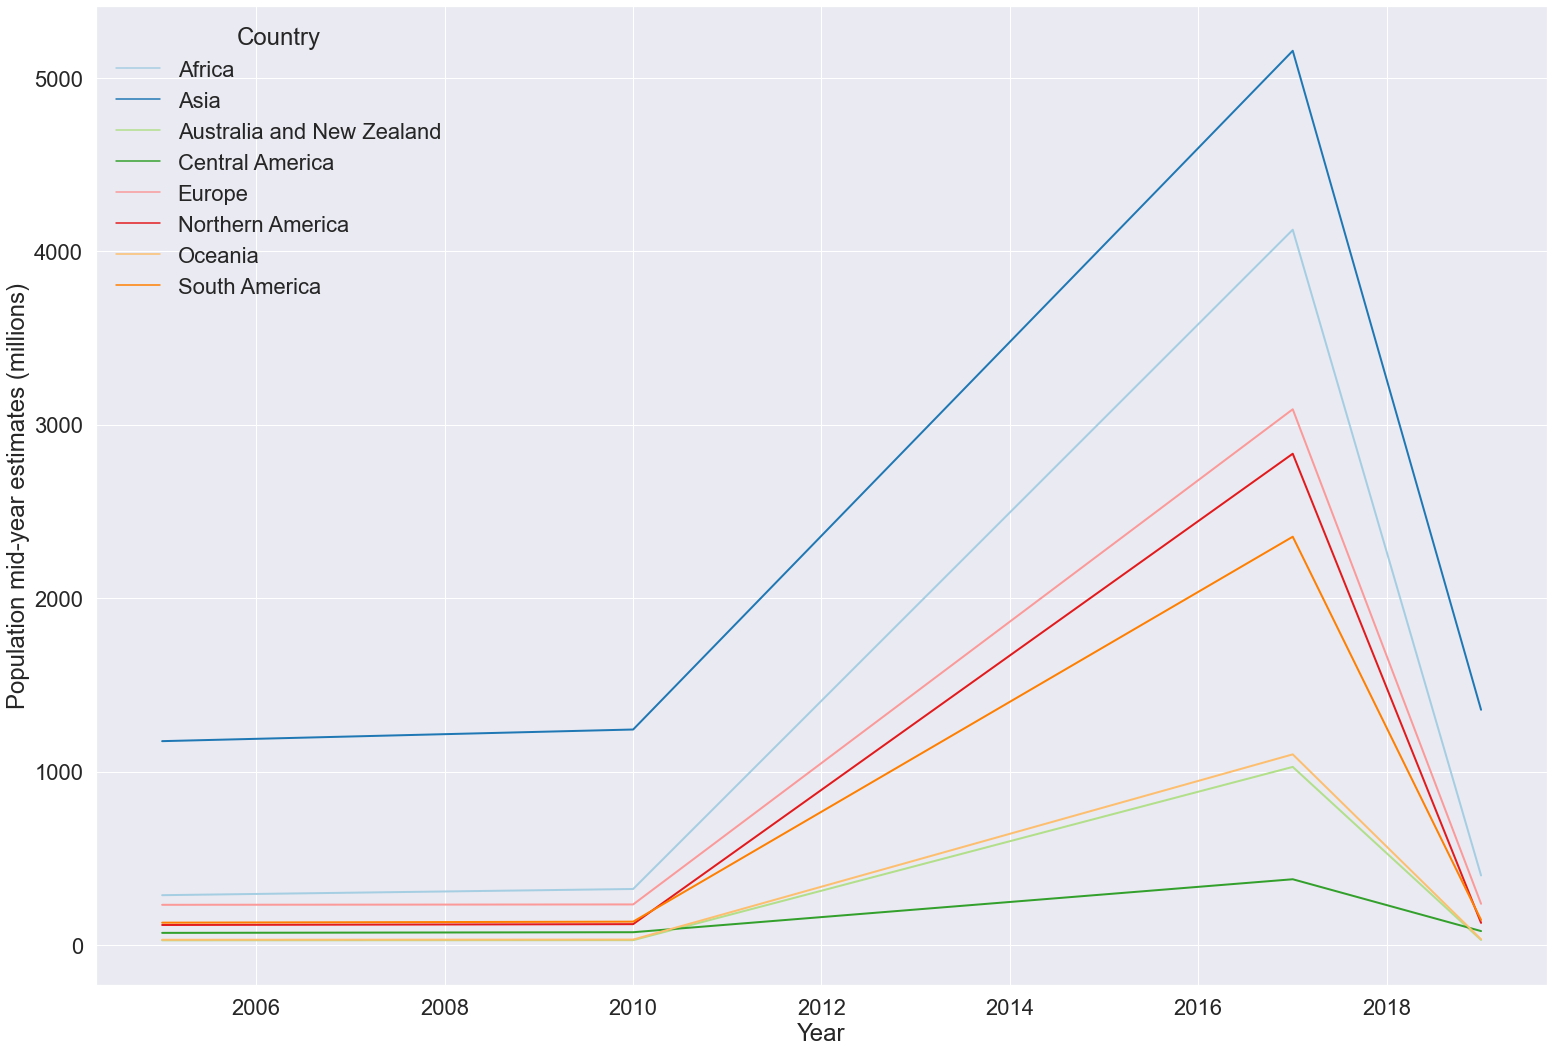

In [46]:
plt.style.use('seaborn')
plt.figure(figsize=(26,18))
sns.set(font_scale = 2)
sns.lineplot(data=pivot_table.reset_index(), x='Year', y='Value', hue='Country', palette='Paired', linewidth= 2.0)
plt.ylabel('Population mid-year estimates (millions)')
plt.show()

## Natural resources EDA

For the EDA, I want to do a generation vs. consumption and supply and demand, as well as look for data on current number of reservoirs (per country and a total for the whole world). 

## Units

An important thing to note beforehand are units and measurements. 
- Barrels or gallons for liquid petroleum fuels (such as gasoline, diesel fuel, and jet fuel) and biofuels (ethanol and biodiesel).
- Cubic feet for natural gas
- Tons for coal (a short ton equals 2,000 pounds; a metric ton equals about 2,205 pounds)

## I. Coal

**Context:**

Coal can be extracted from the earth either via surface mining or underground mining. If it is located less than 61 meters underground, it can be extracted by surface mining. However, most of the world's coal reserves are buried deep, deep underground (like 300 meters), and this is where underground mining is ideal (or aka deep mining). Coal provides steam and power needed to mass-produce items, generate electricity, generate heat, fuel steamships, and fuel the stell industry. 

Coal is an attractive source due to the fact that it is cheap and provides thousands and millions of job opportunities as lots of people are required in the coal extracting, burning, and disposal proceses. However, it is responsible for a multitude of environmental damages. One, burning it in electric power plants emits tons of carbon dioxide (in the U.S. alone, it generates singlehandedly 42% of dangerous mercury emissions, two-thirds of U.S. sulfur dioxide - contributing to acid rain - and generating particulate matter in the air) [NRDC](https://www.nrdc.org/stories/fossil-fuels-dirty-facts). Two, it is a great disturbance to the land and affects the chemistry of rainwater runoff. And if CO2 and SO2 weren't enough, it also releases substantial amounts of methane. 

Before going on about the harms of coal, here is a data from the Global Power Plant Database, last updated June 2021. The Global Plant Database collects the following characteristics and indicators:
- All types of fuel
- Technical characteristics (fuel, technology, ownership)
- Operational characteristics (generation)
- Plant's geolocation
- Plants over 1 megawatt (MW)
- Plants in operation only (in first iteration)

In [47]:
path2 = r'C:\Users\yuvem\OneDrive\Documents\GitHub\Personal-Capstone-Projects\Estimating when four natural resources will be depleted\global_power_plant_database.csv'
power_plant_data = pd.read_csv(path2)
power_plant_data.head()

D:\User\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [48]:
power_plant_data['primary_fuel'].unique()

array(['Hydro', 'Solar', 'Gas', 'Other', 'Oil', 'Wind', 'Nuclear', 'Coal',
       'Waste', 'Biomass', 'Wave and Tidal', 'Petcoke', 'Geothermal',
       'Storage', 'Cogeneration'], dtype=object)

In [49]:
coal_data = power_plant_data[((power_plant_data.primary_fuel == 'Coal'))]
coal_data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
119,ARG,Argentina,CENTRAL BAHIA BLANCA (PIEDRA BUENA) SA,ARG0000031,620.0,-38.7872,-62.2536,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,3213.44,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
126,ARG,Argentina,CENTRAL TERMICA GÜEMES SA,ARG0000287,361.0,-24.6894,-65.0425,Coal,Gas,NaN,...,NaN,NaN,NaN,NaN,1871.05,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
141,ARG,Argentina,COSTANERA,ARG0000046,1982.2,-34.6260,-58.3393,Coal,Gas,Other,...,NaN,NaN,NaN,NaN,10273.70,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
164,ARG,Argentina,CT ECOENERGIA (PETROBRAS),ARG0000032,13.2,-38.6871,-62.3961,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,68.41,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
268,ARG,Argentina,NECOCHEA,ARG0000008,206.0,-38.5785,-58.7108,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,1067.69,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


In [50]:
coal_data = coal_data.drop(columns='other_fuel1')
coal_data = coal_data.drop(columns='other_fuel2')
coal_data = coal_data.drop(columns='other_fuel3')

In [51]:
coal_data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
119,ARG,Argentina,CENTRAL BAHIA BLANCA (PIEDRA BUENA) SA,ARG0000031,620.0,-38.7872,-62.2536,Coal,1990.0,PAMPA ENERGIA,...,NaN,NaN,NaN,NaN,3213.44,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
126,ARG,Argentina,CENTRAL TERMICA GÜEMES SA,ARG0000287,361.0,-24.6894,-65.0425,Coal,1993.3,PAMPA ENERGIA,...,NaN,NaN,NaN,NaN,1871.05,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
141,ARG,Argentina,COSTANERA,ARG0000046,1982.2,-34.6260,-58.3393,Coal,1983.9,ENDESA COSTANERA,...,NaN,NaN,NaN,NaN,10273.70,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
164,ARG,Argentina,CT ECOENERGIA (PETROBRAS),ARG0000032,13.2,-38.6871,-62.3961,Coal,NaN,PETROBRAS ARGENTINA S.A.,...,NaN,NaN,NaN,NaN,68.41,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
268,ARG,Argentina,NECOCHEA,ARG0000008,206.0,-38.5785,-58.7108,Coal,1968.6,CENTRALES DE LA COSTA ATLANTICA SA,...,NaN,NaN,NaN,NaN,1067.69,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


In [52]:
coal_data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'owner',
       'source', 'url', 'geolocation_source', 'wepp_id',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')

In [53]:
coal_data.isnull().sum()/len(coal_data)

country                           0.000000
country_long                      0.000000
name                              0.000000
gppd_idnr                         0.000000
capacity_mw                       0.000000
latitude                          0.000000
longitude                         0.000000
primary_fuel                      0.000000
commissioning_year                0.185837
owner                             0.128326
source                            0.000429
url                               0.000429
geolocation_source                0.000000
wepp_id                           0.346352
year_of_capacity_data             0.766953
generation_gwh_2013               0.869957
generation_gwh_2014               0.802575
generation_gwh_2015               0.741631
generation_gwh_2016               0.739056
generation_gwh_2017               0.745064
generation_gwh_2018               0.793562
generation_gwh_2019               0.878970
generation_data_source            0.722747
estimated_g

In [54]:
# looking at countries
coal_data['country_long'].unique()

array(['Argentina', 'Australia', 'Bangladesh', 'Belgium',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Cambodia', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Finland',
       'France', 'Germany', 'Greece', 'Guatemala', 'Hungary', 'India',
       'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan',
       'Kosovo', 'Kyrgyzstan', 'Laos', 'Macedonia', 'Madagascar',
       'Malaysia', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia',
       'Montenegro', 'Morocco', 'Myanmar', 'Namibia', 'Netherlands',
       'New Zealand', 'Niger', 'North Korea', 'Pakistan', 'Panama',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia',
       'Serbia', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea',
       'Spain', 'Sri Lanka', 'Sweden', 'Taiwan', 'Thailand', 'Turkey',
       'Ukraine', 'United Kingdom', 'United States of America',
       'Uzbekistan', 'Vietnam', 'Zambia', 'Z

In [55]:
# Geo location source
coal_data['geolocation_source'].unique()

array(['Ministerio de Energía y Minería',
       'Australian Renewable Energy Mapping Infrastructure', 'WRI',
       'GEODB', 'Power Africa',
       'Agência Nacional de Energia Elétrica (Brazil)', 'GCPT',
       'Natural Resources Canada', 'Energía Abierta', 'Industry About',
       'Open Power System Data', 'CARMA',
       'Guatemala Energy Data Visualization Center at Universidad Rafael Landivar',
       'North American Cooperation on Energy Information and Comisión Reguladora de Energía',
       'University of Dąbrowa Górnicza', 'EnergyBase (RUS)',
       'UK Renewable Energy Planning Database', 'GEO',
       'U.S. Energy Information Administration'], dtype=object)

In [56]:
# Making separate dataset for capacity_mw; will use later for combined table
coal_subset = coal_data[['country_long','capacity_mw']]

The column 'capacity_mw' stands for capacity megawatts, which is the maximum output of electricity a generator can produce under ideal conditions (measured in megawatts). For instance, if wind turbines accounted for 8% of U.S. installed electricity generation "capacity", this means that under indeal conditions, utilities would be able to supply 8% of the country's electricity needs with wind power. This does not equate to actual amount of electricity produced. 

The actual amount of electricity produced refers to electricity generation (usually in kwh, mwh, hwh, or twh). For instance, a wind turbine with a ccapacity of 1.5 mw that is running at max capacity for 2 hours generates at the end of the second hour 3 mwh of energy (1.5 * 2). Not all generation sources are operating at their maximum capacity at all times. 

In [57]:
est_gen_gwh_coal = coal_data[['country_long','estimated_generation_gwh_2017']]
est_gen_gwh_coal

,country_long,estimated_generation_gwh_2017
119,Argentina,3213.44
126,Argentina,1871.05
141,Argentina,10273.70
164,Argentina,68.41
268,Argentina,1067.69
...,...,...
34903,Vietnam,3660.12
34906,Vietnam,6194.82
34907,Vietnam,6199.80
34928,Zambia,2131.66


In [58]:
est_gen_gwh_coal[((est_gen_gwh_coal.country_long == 'Belgium'))]

,country_long,estimated_generation_gwh_2017
1066,Belgium,NaN


In [59]:
# eliminate NaN's
est_gen_gwh_coal = est_gen_gwh_coal[est_gen_gwh_coal['estimated_generation_gwh_2017'].notna()]
est_gen_gwh_coal = est_gen_gwh_coal[est_gen_gwh_coal['estimated_generation_gwh_2017'] != 'nan']
est_gen_gwh_coal

,country_long,estimated_generation_gwh_2017
119,Argentina,3213.44
126,Argentina,1871.05
141,Argentina,10273.70
164,Argentina,68.41
268,Argentina,1067.69
...,...,...
34903,Vietnam,3660.12
34906,Vietnam,6194.82
34907,Vietnam,6199.80
34928,Zambia,2131.66


In [60]:
est_gen_gwh_coal_avg = est_gen_gwh_coal.groupby('country_long').mean().reset_index()
est_gen_gwh_coal_avg

,country_long,estimated_generation_gwh_2017
0,Argentina,2797.306667
1,Australia,5891.468214
2,Bangladesh,902.320000
3,Bosnia and Herzegovina,2678.542500
4,Botswana,1493.980000
...,...,...
59,United States of America,4023.992692
60,Uzbekistan,1181.050000
61,Vietnam,2930.792500
62,Zambia,2131.660000


#### Top 10 Countries with highest estimated generation gwh for 2017 - Coal

In [61]:
top_gwh_2017_coal = est_gen_gwh_coal_avg.nlargest(10, ['estimated_generation_gwh_2017'])
top_gwh_2017_coal

,country_long,estimated_generation_gwh_2017
54,Taiwan,14334.082857
51,South Korea,13926.317222
50,South Africa,13512.345294
28,Malaysia,13249.997143
22,Israel,10902.835000
30,Mexico,10187.296667
44,Portugal,7723.465000
55,Thailand,6535.806000
34,Morocco,6413.933333
1,Australia,5891.468214


## II. Oil

A country with large amounts of reserves does not always translate to strong production numbers for petroleum, oil, and by-products. Oil reserves simply serve as an estimate of the amount of economically recoverable crude oil in a particular region. To qualify, these reserves must have the potential of being extracted under current technological constraints. While countries like the U.S. and Russia are low on the list of oil reserves, they rank highly in terms of oil production. More than 95 million barrels of oil were produced globally every day in 2019, and the U.S., Saudi Arabia, and Russia are among the world’s top oil-producing countries, respectively. [Visual Capitalist](https://www.visualcapitalist.com/ranking-the-countries-with-the-largest-proven-global-oil-reserves-in-the-world/)

In [62]:
oil_data = power_plant_data[((power_plant_data.primary_fuel == 'Oil'))]
oil_data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
76,AGO,Angola,Biopio,WRI1023002,22.80,-12.4706,13.7319,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,64.92,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
81,AGO,Angola,Huambo,WRI1023006,16.26,-12.7600,15.7500,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,46.30,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
83,AGO,Angola,Luanda Diesel,WRI1023008,58.00,-8.8383,13.2344,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,165.16,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
84,AGO,Angola,Luanda Refinery,WRI1023009,18.50,-8.8383,13.2344,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,52.68,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
85,AGO,Angola,Malongo,WRI1023010,10.00,-5.5500,12.2000,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,28.47,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


In [63]:
# Making separate dataset for capacity_mw; will use later for combined table
oil_subset = oil_data[['country_long','capacity_mw']]

In [64]:
oil_data.isnull().sum()/len(oil_data)

country                           0.000000
country_long                      0.000000
name                              0.000000
gppd_idnr                         0.000000
capacity_mw                       0.000000
latitude                          0.000000
longitude                         0.000000
primary_fuel                      0.000000
other_fuel1                       0.909483
other_fuel2                       0.994828
other_fuel3                       0.999138
commissioning_year                0.309052
owner                             0.375000
source                            0.000000
url                               0.000000
geolocation_source                0.002155
wepp_id                           0.484052
year_of_capacity_data             0.251293
generation_gwh_2013               0.661638
generation_gwh_2014               0.662069
generation_gwh_2015               0.646121
generation_gwh_2016               0.635345
generation_gwh_2017               0.641379
generation_

In [65]:
oil_data = oil_data.drop(columns='other_fuel1')
oil_data = oil_data.drop(columns='other_fuel2')
oil_data = oil_data.drop(columns='other_fuel3')

In [66]:
est_gen_gwh_oil = oil_data[['country_long','estimated_generation_gwh_2017']]
est_gen_gwh_oil

,country_long,estimated_generation_gwh_2017
76,Angola,64.92
81,Angola,46.30
83,Angola,165.16
84,Angola,52.68
85,Angola,28.47
...,...,...
34925,Zambia,53.66
34926,Zambia,55.13
34929,Zambia,36.75
34931,Zambia,183.79


In [67]:
# eliminate NaN's
est_gen_gwh_oil = est_gen_gwh_oil[est_gen_gwh_oil['estimated_generation_gwh_2017'].notna()]
est_gen_gwh_oil = est_gen_gwh_oil[est_gen_gwh_oil['estimated_generation_gwh_2017'] != 'nan']
est_gen_gwh_oil

,country_long,estimated_generation_gwh_2017
76,Angola,64.92
81,Angola,46.30
83,Angola,165.16
84,Angola,52.68
85,Angola,28.47
...,...,...
34925,Zambia,53.66
34926,Zambia,55.13
34929,Zambia,36.75
34931,Zambia,183.79


In [68]:
est_gen_gwh_oil_avg = est_gen_gwh_oil.groupby('country_long').mean().reset_index()
est_gen_gwh_oil_avg

,country_long,estimated_generation_gwh_2017
0,Angola,64.970000
1,Argentina,56.593958
2,Australia,50.560238
3,Azerbaijan,1260.900000
4,Bahrain,0.040000
...,...,...
77,Uruguay,14.395000
78,Uzbekistan,121.550000
79,Vietnam,65.841667
80,Yemen,230.751667


#### Top 10 Countries with highest estimated generation gwh for 2017 - Oil

In [69]:
top_gwh_2017_oil = est_gen_gwh_oil_avg.nlargest(10, ['estimated_generation_gwh_2017'])
top_gwh_2017_oil

,country_long,estimated_generation_gwh_2017
69,Taiwan,4264.880000
38,Iraq,4091.345000
63,South Korea,3221.960000
42,Japan,2837.236154
59,Saudi Arabia,2524.175849
68,Syrian Arab Republic,2432.105714
37,Iran,1732.081111
54,Pakistan,1632.669286
57,Poland,1294.015000
3,Azerbaijan,1260.900000


### Capacity Mw - Oil

In [70]:
oil_subset = oil_subset[oil_subset['capacity_mw'].notna()]
oil_subset = oil_subset[oil_subset['capacity_mw'] != 'nan']
oil_subset

,country_long,capacity_mw
76,Angola,22.80
81,Angola,16.26
83,Angola,58.00
84,Angola,18.50
85,Angola,10.00
...,...,...
34925,Zambia,14.60
34926,Zambia,15.00
34929,Zambia,10.00
34931,Zambia,50.00


In [71]:
oil_subset_avg = oil_subset.groupby('country_long').mean().reset_index()
oil_subset_avg

,country_long,capacity_mw
0,Angola,22.816667
1,Antarctica,6.600000
2,Argentina,12.492594
3,Australia,26.180238
4,Azerbaijan,2400.000000
...,...,...
100,Uzbekistan,300.000000
101,Vietnam,152.500000
102,Western Sahara,23.400000
103,Yemen,107.500000


In [72]:
top_oil_capacity = oil_subset_avg.nlargest(10, ['capacity_mw'])
top_oil_capacity

,country_long,capacity_mw
4,Azerbaijan,2400.000000
89,Taiwan,2000.000000
54,Japan,1696.930769
83,South Korea,1551.666667
81,Singapore,1316.666667
95,Turkmenistan,1137.500000
82,South Africa,1033.500000
50,Iraq,1006.666667
78,Saudi Arabia,937.781698
32,Estonia,920.500000


## Oil Consumption

This next data comes from the [Statistical Review of World Energy](https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy/downloads.html) by BP. 

In [92]:
path3 = r'C:\Users\yuvem\Downloads\bp-stats-review-2021-all-data.xlsx'
print(path3)

C:\Users\yuvem\Downloads\bp-stats-review-2021-all-data.xlsx


In [93]:
xls = pd.ExcelFile(path3)
print(xls.sheet_names)

['Contents', 'Primary Energy Consumption', 'Primary Energy - Cons by fuel', 'Primary Energy - Cons capita', 'Carbon Dioxide Emissions', 'Natural Gas Flaring', 'CO2 From Flaring', 'CO2 Excluding Flaring', 'Oil - Proved reserves', 'Oil - Proved reserves history', 'Oil Production - Barrels', 'Oil Production - Tonnes', 'Oil Production - Crude Conds', 'Oil Production - NGLs', 'Total Liquids - Consumption', 'Oil Consumption - Barrels', 'Oil Consumption - Tonnes', 'Oil Consumption - EJ', 'Oil - Regional Consumption ', 'Oil - Spot crude prices', 'Oil - Crude prices since 1861', 'Oil - Refinery throughput', 'Oil - Refining capacity', 'Oil - Regional refining margins', 'Oil - Trade movements', 'Oil - Inter-area movements ', 'Oil - Trade 2019 - 2020', 'Gas - Proved reserves', 'Gas - Proved reserves history ', 'Gas Production - Bcm', 'Gas Production - Bcf', 'Gas Production - EJ', 'Gas Consumption - Bcm', 'Gas Consumption - Bcf', 'Gas Consumption - EJ', 'Gas - Prices ', 'Gas - Inter-regional trade'

In [195]:
ds_oil_consumption = pd.read_excel(xls, 'Oil Consumption - Barrels', header=[2])
ds_oil_consumption.head()

,Thousand barrels daily,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2016,2017,2018,2019,2020,2020.1,2009-19,2020.2,Unnamed: 60,Unnamed: 61
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Canada,1108.116301,1167.468795,1245.557068,1322.157350,1380.190329,1471.579753,1512.128247,1588.909235,1754.885644,...,2452.037349,2422.998806,2500.806350,2536.766731,2282.478848,-0.100241,0.010526,0.025797,NaN,NaN
2,Mexico,315.871088,333.048484,357.305957,386.144762,410.021906,440.735987,467.284852,523.353166,564.177805,...,1950.178577,1883.227421,1835.957946,1698.196457,1312.288887,-0.227246,-0.017268,0.014832,NaN,NaN
3,US,11512.436000,12084.373000,12560.345000,13392.866000,14136.795000,14697.186000,15212.493000,16366.984000,17307.679000,...,18622.304626,18877.537534,19446.748247,19475.375148,17177.647623,-0.117981,0.007739,0.194147,NaN,NaN
4,Total North America,12936.423389,13584.890278,14163.208026,15101.168112,15927.007234,16609.501741,17191.906098,18479.246401,19626.742450,...,23024.520552,23183.763761,23783.512543,23710.338336,20772.415358,-0.123909,0.005987,0.234777,NaN,NaN


In [196]:
ds_oil_consumption = ds_oil_consumption.drop(0)
ds_oil_consumption.head()

,Thousand barrels daily,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2016,2017,2018,2019,2020,2020.1,2009-19,2020.2,Unnamed: 60,Unnamed: 61
1,Canada,1108.116301,1167.468795,1245.557068,1322.157350,1380.190329,1471.579753,1512.128247,1588.909235,1754.885644,...,2452.037349,2422.998806,2500.806350,2536.766731,2282.478848,-0.100241,0.010526,0.025797,NaN,NaN
2,Mexico,315.871088,333.048484,357.305957,386.144762,410.021906,440.735987,467.284852,523.353166,564.177805,...,1950.178577,1883.227421,1835.957946,1698.196457,1312.288887,-0.227246,-0.017268,0.014832,NaN,NaN
3,US,11512.436000,12084.373000,12560.345000,13392.866000,14136.795000,14697.186000,15212.493000,16366.984000,17307.679000,...,18622.304626,18877.537534,19446.748247,19475.375148,17177.647623,-0.117981,0.007739,0.194147,NaN,NaN
4,Total North America,12936.423389,13584.890278,14163.208026,15101.168112,15927.007234,16609.501741,17191.906098,18479.246401,19626.742450,...,23024.520552,23183.763761,23783.512543,23710.338336,20772.415358,-0.123909,0.005987,0.234777,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
ds_oil_consumption.rename({'Thousand barrels daily':'Country'}, axis=1, inplace=True)
ds_oil_consumption.head()

,Country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2016,2017,2018,2019,2020,2020.1,2009-19,2020.2,Unnamed: 60,Unnamed: 61
1,Canada,1108.116301,1167.468795,1245.557068,1322.157350,1380.190329,1471.579753,1512.128247,1588.909235,1754.885644,...,2452.037349,2422.998806,2500.806350,2536.766731,2282.478848,-0.100241,0.010526,0.025797,NaN,NaN
2,Mexico,315.871088,333.048484,357.305957,386.144762,410.021906,440.735987,467.284852,523.353166,564.177805,...,1950.178577,1883.227421,1835.957946,1698.196457,1312.288887,-0.227246,-0.017268,0.014832,NaN,NaN
3,US,11512.436000,12084.373000,12560.345000,13392.866000,14136.795000,14697.186000,15212.493000,16366.984000,17307.679000,...,18622.304626,18877.537534,19446.748247,19475.375148,17177.647623,-0.117981,0.007739,0.194147,NaN,NaN
4,Total North America,12936.423389,13584.890278,14163.208026,15101.168112,15927.007234,16609.501741,17191.906098,18479.246401,19626.742450,...,23024.520552,23183.763761,23783.512543,23710.338336,20772.415358,-0.123909,0.005987,0.234777,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
ds_oil_consumption['Country'].unique()

array(['Canada', 'Mexico', 'US', 'Total North America', nan, 'Argentina',
       'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Peru',
       'Trinidad & Tobago', 'Venezuela', 'Central America',
       'Other Caribbean', 'Other South America',
       'Total S. & Cent. America', 'Austria', 'Belgium', 'Bulgaria',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'Other Europe ', 'Total Europe ', 'Azerbaijan', 'Belarus',
       'Kazakhstan', 'Russian Federation', 'Turkmenistan', 'USSR',
       'Uzbekistan', 'Other CIS', 'Total CIS', 'Iran', 'Iraq', 'Israel',
       'Kuwait', 'Oman', 'Qatar', 'Saudi Arabia', 'United Arab Emirates',
       'Other

### Total World Oil Consumption

In [199]:
ds_oil_consumption = ds_oil_consumption.drop(columns='Unnamed: 60')
ds_oil_consumption = ds_oil_consumption.drop(columns='Unnamed: 61')
ds_oil_consumption = ds_oil_consumption.drop(columns='2020.1')
ds_oil_consumption = ds_oil_consumption.drop(columns='2009-19')
ds_oil_consumption = ds_oil_consumption.drop(columns='2020.2')

In [200]:
i = ds_oil_consumption[((ds_oil_consumption.Country == 'Total World'))].index
i

Int64Index([107], dtype='int64')

In [201]:
ds_oil_consumption = ds_oil_consumption.iloc[0:107]
ds_oil_consumption

,Country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Canada,1108.116301,1167.468795,1245.557068,1322.157350,1380.190329,1471.579753,1512.128247,1588.909235,1754.885644,...,2399.914318,2423.735391,2419.498225,2418.769294,2442.003685,2452.037349,2422.998806,2500.806350,2536.766731,2282.478848
2,Mexico,315.871088,333.048484,357.305957,386.144762,410.021906,440.735987,467.284852,523.353166,564.177805,...,2065.143677,2082.999487,2034.163494,1959.694886,1939.288594,1950.178577,1883.227421,1835.957946,1698.196457,1312.288887
3,US,11512.436000,12084.373000,12560.345000,13392.866000,14136.795000,14697.186000,15212.493000,16366.984000,17307.679000,...,17996.649973,17585.859027,18011.234748,18131.069496,18524.405841,18622.304626,18877.537534,19446.748247,19475.375148,17177.647623
4,Total North America,12936.423389,13584.890278,14163.208026,15101.168112,15927.007234,16609.501741,17191.906098,18479.246401,19626.742450,...,22461.707968,22092.593905,22464.896467,22509.533675,22905.698119,23024.520552,23183.763761,23783.512543,23710.338336,20772.415358
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Vietnam,31.347253,68.509536,100.338166,102.080276,123.713820,128.258016,108.502315,111.719328,109.934923,...,361.382301,371.049263,380.057422,391.327191,437.304019,466.251029,491.596102,524.980717,557.066352,490.671699
104,Other Asia Pacific,67.590358,71.148112,75.673733,79.659205,83.699282,87.531912,89.937475,100.091393,99.581218,...,320.280069,331.366018,349.157603,373.583348,423.734520,425.608388,437.511754,463.934798,479.164933,471.636775
105,Total Asia Pacific,3243.521563,3701.321911,4308.750415,4910.909350,5723.982779,6654.569969,7402.361613,7949.387963,9067.827714,...,28657.508082,29814.565702,30420.993215,30910.506928,32332.455488,33522.794504,34690.365196,35329.745427,35697.881676,33615.296109
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
i3 = ds_oil_consumption[((ds_oil_consumption.Country == 'Total Africa'))]
i3

,Country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
85,Total Africa,552.231932,603.237323,601.077565,632.618907,646.668008,712.363137,803.975551,870.740588,938.441846,...,3382.602777,3553.162319,3691.358104,3748.764759,3877.485951,3905.762584,3955.858173,4044.572553,4097.654891,3558.994372


In [203]:
i4 = ds_oil_consumption[((ds_oil_consumption.Country == 'Total S. & Cent. America'))]

In [204]:
i5 = ds_oil_consumption[((ds_oil_consumption.Country == 'Total Europe'))]

In [205]:
i6 = ds_oil_consumption[((ds_oil_consumption.Country == 'Total CIS'))]

In [206]:
i7 = ds_oil_consumption[((ds_oil_consumption.Country == 'Total Middle East'))]

In [207]:
i8 = ds_oil_consumption[((ds_oil_consumption.Country == 'Total Asia Pacific'))]

In [208]:
i9 = ds_oil_consumption[((ds_oil_consumption.Country == 'Total North America'))]

In [209]:
africa_asia2 = i8.append(i3, ignore_index=True)

In [210]:
southcentamer_euro = i4.append(i6, ignore_index=True)

In [211]:
first_four2 = africa_asia2.append(southcentamer_euro, ignore_index=True)

In [212]:
cis_mideast = i6.append(i7, ignore_index=True)

In [213]:
last_three = i9.append(cis_mideast, ignore_index=True)

In [214]:
total_world_oil_consumption = first_four2.append(last_three, ignore_index=True)
total_world_oil_consumption

,Country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Total Asia Pacific,3243.521563,3701.321911,4308.750415,4910.909350,5723.982779,6654.569969,7402.361613,7949.387963,9067.827714,...,28657.508082,29814.565702,30420.993215,30910.506928,32332.455488,33522.794504,34690.365196,35329.745427,35697.881676,33615.296109
1,Total Africa,552.231932,603.237323,601.077565,632.618907,646.668008,712.363137,803.975551,870.740588,938.441846,...,3382.602777,3553.162319,3691.358104,3748.764759,3877.485951,3905.762584,3955.858173,4044.572553,4097.654891,3558.994372
2,Total S. & Cent. America,1690.022296,1785.261366,1843.748644,1965.301823,2057.070433,2166.530035,2290.068143,2472.156651,2710.286197,...,6064.762277,6260.390420,6490.587479,6478.152091,6376.512959,6150.669812,6135.825395,6000.155934,5888.710932,5273.759800
3,Total CIS,3313.952416,3548.818796,3866.126221,4107.310371,4376.248756,4826.362643,5126.539667,5547.117958,5981.449761,...,3873.204351,3990.955325,4008.055258,4165.441738,4102.258984,4156.160955,4204.940571,4319.604515,4366.963524,4148.832934
4,Total North America,12936.423389,13584.890278,14163.208026,15101.168112,15927.007234,16609.501741,17191.906098,18479.246401,19626.742450,...,22461.707968,22092.593905,22464.896467,22509.533675,22905.698119,23024.520552,23183.763761,23783.512543,23710.338336,20772.415358
5,Total CIS,3313.952416,3548.818796,3866.126221,4107.310371,4376.248756,4826.362643,5126.539667,5547.117958,5981.449761,...,3873.204351,3990.955325,4008.055258,4165.441738,4102.258984,4156.160955,4204.940571,4319.604515,4366.963524,4148.832934
6,Total Middle East,863.348674,887.263928,915.450696,943.120240,976.446369,1035.121868,1088.947241,1169.439642,1264.253823,...,8175.899417,8502.453112,8689.817447,8884.984619,8872.889118,9001.753371,8999.505568,8879.097846,9010.524796,8320.556048


In [215]:
#

In [216]:
total_world_oil_consumption_melt = total_world_oil_consumption.melt(id_vars=['Country'], var_name='Year', value_name='Barrels_daily')
total_world_oil_consumption_melt

,Country,Year,Barrels_daily
0,Total Asia Pacific,1965,3243.521563
1,Total Africa,1965,552.231932
2,Total S. & Cent. America,1965,1690.022296
3,Total CIS,1965,3313.952416
4,Total North America,1965,12936.423389
...,...,...,...
387,Total S. & Cent. America,2020,5273.759800
388,Total CIS,2020,4148.832934
389,Total North America,2020,20772.415358
390,Total CIS,2020,4148.832934


In [217]:
total_world_oil_pivot_table = total_world_oil_consumption_melt.pivot_table(index=['Country', 'Year'])
total_world_oil_pivot_table.head()

Barrels_daily
Country      Year               
Total Africa 1965     552.231932
             1966     603.237323
             1967     601.077565
             1968     632.618907
             1969     646.668008

In [218]:
total_world_oil_pivot_table.dropna()

Barrels_daily
Country                  Year               
Total Africa             1965     552.231932
                         1966     603.237323
                         1967     601.077565
                         1968     632.618907
                         1969     646.668008
...                                      ...
Total S. & Cent. America 2016    6150.669812
                         2017    6135.825395
                         2018    6000.155934
                         2019    5888.710932
                         2020    5273.759800

[336 rows x 1 columns]

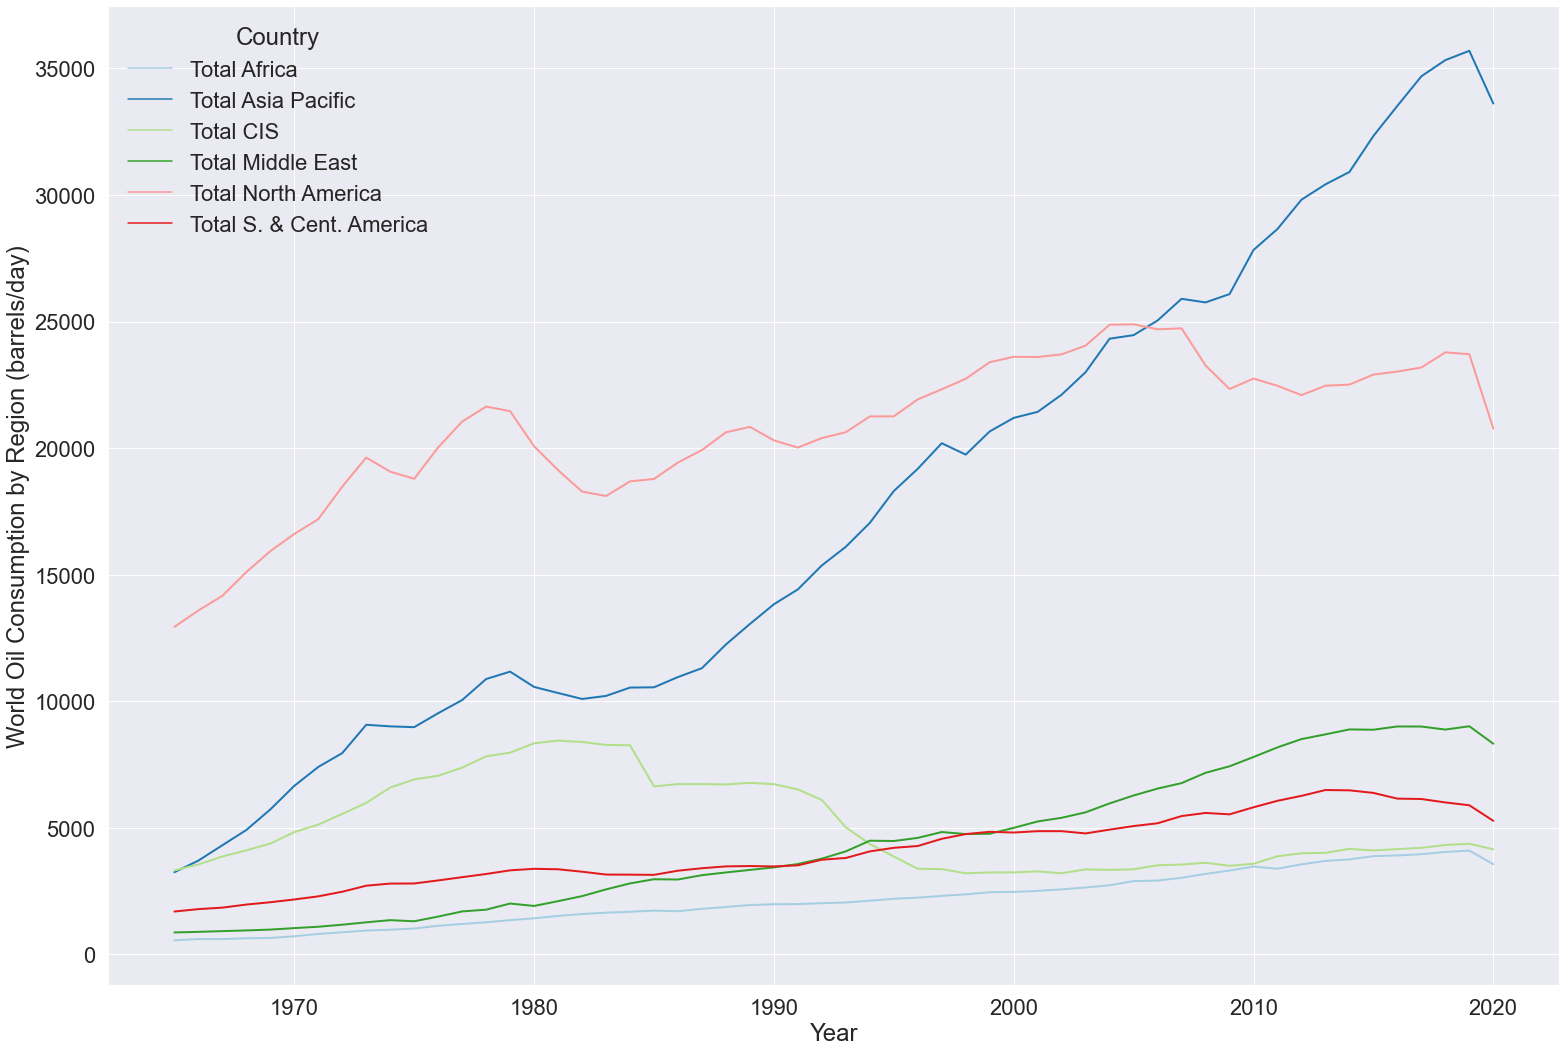

In [219]:
plt.style.use('seaborn')
plt.figure(figsize=(26,18))
sns.set(font_scale = 2)
sns.lineplot(data=total_world_oil_pivot_table.reset_index(), x='Year', y='Barrels_daily', hue='Country', palette='Paired', linewidth= 2.0)
plt.ylabel('World Oil Consumption by Region (barrels/day)')
plt.show()

### Oil Consumption By Country

In [234]:
# Check
ds_oil_consumption['Country'].unique()

array(['Canada', 'Mexico', 'US', 'Total North America', nan, 'Argentina',
       'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Peru',
       'Trinidad & Tobago', 'Venezuela', 'Central America',
       'Other Caribbean', 'Other South America',
       'Total S. & Cent. America', 'Austria', 'Belgium', 'Bulgaria',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'Other Europe ', 'Total Europe ', 'Azerbaijan', 'Belarus',
       'Kazakhstan', 'Russian Federation', 'Turkmenistan', 'USSR',
       'Uzbekistan', 'Other CIS', 'Total CIS', 'Iran', 'Iraq', 'Israel',
       'Kuwait', 'Oman', 'Qatar', 'Saudi Arabia', 'United Arab Emirates',
       'Other

In [235]:
total_south = ds_oil_consumption[((ds_oil_consumption.Country == 'Total S. & Cent. America'))].index
country_oil_consumption = ds_oil_consumption.drop(total_south)

In [237]:
total_north = country_oil_consumption[((ds_oil_consumption.Country == 'Total North America'))].index
country_oil_consumption = country_oil_consumption.drop(total_north)

<ipython-input-237-bccf7dd5dfc1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_north = country_oil_consumption[((ds_oil_consumption.Country == 'Total North America'))].index


In [238]:
total_cis = country_oil_consumption[((ds_oil_consumption.Country == 'Total CIS'))].index
country_oil_consumption = country_oil_consumption.drop(total_cis)

<ipython-input-238-3a25e75d1d88>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_cis = country_oil_consumption[((ds_oil_consumption.Country == 'Total CIS'))].index


In [239]:
total_asia = country_oil_consumption[((ds_oil_consumption.Country == 'Total Asia Pacific'))].index
country_oil_consumption = country_oil_consumption.drop(total_asia)

<ipython-input-239-b0021e9728b7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_asia = country_oil_consumption[((ds_oil_consumption.Country == 'Total Asia Pacific'))].index


In [240]:
total_mideast = ds_oil_consumption[((ds_oil_consumption.Country == 'Total Middle East'))].index
country_oil_consumption = country_oil_consumption.drop(total_mideast)

In [241]:
total_africa = country_oil_consumption[((ds_oil_consumption.Country == 'Total Africa'))].index
country_oil_consumption = country_oil_consumption.drop(total_africa)

<ipython-input-241-2cbe2d42dd2c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_africa = country_oil_consumption[((ds_oil_consumption.Country == 'Total Africa'))].index


In [242]:
total_euro = country_oil_consumption[((ds_oil_consumption.Country == 'Total Europe'))].index
country_oil_consumption = country_oil_consumption.drop(total_euro)

<ipython-input-242-cecb2ec022c0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_euro = country_oil_consumption[((ds_oil_consumption.Country == 'Total Europe'))].index


In [244]:
world_i = country_oil_consumption[((ds_oil_consumption.Country == 'Total World'))].index
country_oil_consumption = country_oil_consumption.drop(world_i)

<ipython-input-244-a2aaabce5bf2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  world_i = country_oil_consumption[((ds_oil_consumption.Country == 'Total World'))].index


In [245]:
country_oil_consumption 

,Country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Canada,1108.116301,1167.468795,1245.557068,1322.157350,1380.190329,1471.579753,1512.128247,1588.909235,1754.885644,...,2399.914318,2423.735391,2419.498225,2418.769294,2442.003685,2452.037349,2422.998806,2500.806350,2536.766731,2282.478848
2,Mexico,315.871088,333.048484,357.305957,386.144762,410.021906,440.735987,467.284852,523.353166,564.177805,...,2065.143677,2082.999487,2034.163494,1959.694886,1939.288594,1950.178577,1883.227421,1835.957946,1698.196457,1312.288887
3,US,11512.436000,12084.373000,12560.345000,13392.866000,14136.795000,14697.186000,15212.493000,16366.984000,17307.679000,...,17996.649973,17585.859027,18011.234748,18131.069496,18524.405841,18622.304626,18877.537534,19446.748247,19475.375148,17177.647623
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Argentina,455.904822,471.145265,484.093001,493.491220,516.678254,473.100912,505.333808,501.607240,507.443178,...,611.941125,647.341905,688.164207,678.431714,693.614133,675.249100,669.594027,640.478928,562.671371,502.648014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Taiwan,43.855726,51.777699,61.370959,72.863716,87.341151,104.728986,145.157425,156.195765,199.928274,...,993.670845,985.788628,1021.609523,1052.168344,1076.681019,1082.509358,1067.279410,1074.331117,1021.626523,973.107164
102,Thailand,47.561397,55.992795,61.973425,81.130000,87.969644,102.808877,114.386575,142.747814,151.426247,...,1166.848840,1224.696867,1266.409421,1270.257079,1312.714289,1347.376883,1390.160990,1399.790588,1404.737197,1271.199472
103,Vietnam,31.347253,68.509536,100.338166,102.080276,123.713820,128.258016,108.502315,111.719328,109.934923,...,361.382301,371.049263,380.057422,391.327191,437.304019,466.251029,491.596102,524.980717,557.066352,490.671699
104,Other Asia Pacific,67.590358,71.148112,75.673733,79.659205,83.699282,87.531912,89.937475,100.091393,99.581218,...,320.280069,331.366018,349.157603,373.583348,423.734520,425.608388,437.511754,463.934798,479.164933,471.636775


In [246]:
#ds_oil_consumption.iloc[:, 1:]
ds_oil_consumption_melt = country_oil_consumption.melt(id_vars=['Country'], var_name='Year', value_name='Barrels_daily')
ds_oil_consumption_melt

,Country,Year,Barrels_daily
0,Canada,1965,1108.116301
1,Mexico,1965,315.871088
2,US,1965,11512.436000
3,NaN,1965,NaN
4,Argentina,1965,455.904822
...,...,...,...
5595,Taiwan,2020,973.107164
5596,Thailand,2020,1271.199472
5597,Vietnam,2020,490.671699
5598,Other Asia Pacific,2020,471.636775


In [247]:
#ds_oil_consumption2 = ds_oil_consumption_melt.pivot_table(index=['Year'], columns=['Country'], values=['Barrels_daily'], fill_value=0)
pivot_table2 = ds_oil_consumption_melt.pivot_table(index=['Country', 'Year'])
pivot_table2.head()

Barrels_daily
Country Year               
Algeria 1965      26.716192
        1966      35.353233
        1967      33.285973
        1968      35.374426
        1969      37.714329

In [248]:
pivot_table2.dropna()

Barrels_daily
Country        Year               
Algeria        1965      26.716192
               1966      35.353233
               1967      33.285973
               1968      35.374426
               1969      37.714329
...                            ...
Western Africa 2016     633.833068
               2017     696.812004
               2018     808.008446
               2019     816.357377
               2020     726.432937

[4871 rows x 1 columns]

In [253]:
top_10_oil_consumption = pivot_table2.nlargest(10, ['Barrels_daily'])
top_10_oil_consumption

Barrels_daily
Country Year               
US      2005   20531.481595
        2004   20498.324486
        2006   20312.849742
        2007   20208.143205
        2003   19848.281507
        2002   19625.009175
        2000   19593.518973
        2001   19534.487359
        2019   19475.375148
        2018   19446.748247

Woah, U.S. had the highest

In [254]:
top_50_oil_consumption = pivot_table2.nlargest(50, ['Barrels_daily'])
top_50_oil_consumption

Barrels_daily
Country       Year               
US            2005   20531.481595
              2004   20498.324486
              2006   20312.849742
              2007   20208.143205
              2003   19848.281507
              2002   19625.009175
              2000   19593.518973
              2001   19534.487359
              2019   19475.375148
              2018   19446.748247
              1999   19425.229658
              2017   18877.537534
              2008   18848.284842
              1978   18846.622000
              1998   18826.629890
              2016   18622.304626
              1997   18538.389274
              2015   18524.405841
              1979   18512.540000
              1977   18431.419000
              2010   18321.794367
              1996   18244.396623
              2014   18131.069496
              2009   18030.470370
              2013   18011.234748
              2011   17996.649973
              1995   17634.400082
              1994   17634.079918
              2012   17585.859027
              1976   17461.066000
              1989   17325.152329
              1973   17307.679000
              1988   17283.313005
              2020   17177.647623
              1993   17161.651329
              1980   17055.861000
              1992   16968.781199
              1990   16939.725523
Total Europe  1979   16910.369829
              2006   16765.463473
              2005   16742.374472
US            1987   16665.050014
              1991   16657.325121
              1974   16652.710000
Total Europe  1998   16636.163225
              1990   16600.232715
              2004   16589.038582
              1978   16522.687246
              2003   16476.058791
              2007   16472.014179

## Oil Production

In [255]:
ds_oil_production = pd.read_excel(xls, 'Oil Production - Barrels', header=[2])
ds_oil_production.head()

,Thousand barrels daily,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2016,2017,2018,2019,2020,2020.1,2009-19,2020.2,Unnamed: 60,Unnamed: 61
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Canada,920.000,1012.000,1106.000,1194.000,1306.000,1473.000,1582.000,1829.000,2114.000,...,4463.638847,4813.033351,5243.879959,5372.417032,5135.483143,-0.044102,0.053100,0.058100,NaN,NaN
2,Mexico,362.000,370.000,411.000,439.000,461.000,487.000,486.000,506.000,525.000,...,2455.799498,2224.150160,2068.371143,1918.142825,1909.906457,-0.004294,-0.043052,0.021607,NaN,NaN
3,US,9014.148,9579.241,10219.252,10599.743,10827.674,11296.849,11155.778,11184.896,10945.953,...,12360.764169,13154.380658,15333.564712,17072.362726,16475.717273,-0.034948,0.089170,0.186396,NaN,NaN
4,Total North America,10296.148,10961.241,11736.252,12232.743,12594.674,13256.849,13223.778,13519.896,13584.953,...,19280.202514,20191.564169,22645.815814,24362.922583,23521.106873,-0.034553,0.061227,0.266103,NaN,NaN


In [256]:
ds_oil_production = ds_oil_production.drop(0)
ds_oil_production.head()

,Thousand barrels daily,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2016,2017,2018,2019,2020,2020.1,2009-19,2020.2,Unnamed: 60,Unnamed: 61
1,Canada,920.000,1012.000,1106.000,1194.000,1306.000,1473.000,1582.000,1829.000,2114.000,...,4463.638847,4813.033351,5243.879959,5372.417032,5135.483143,-0.044102,0.053100,0.058100,NaN,NaN
2,Mexico,362.000,370.000,411.000,439.000,461.000,487.000,486.000,506.000,525.000,...,2455.799498,2224.150160,2068.371143,1918.142825,1909.906457,-0.004294,-0.043052,0.021607,NaN,NaN
3,US,9014.148,9579.241,10219.252,10599.743,10827.674,11296.849,11155.778,11184.896,10945.953,...,12360.764169,13154.380658,15333.564712,17072.362726,16475.717273,-0.034948,0.089170,0.186396,NaN,NaN
4,Total North America,10296.148,10961.241,11736.252,12232.743,12594.674,13256.849,13223.778,13519.896,13584.953,...,19280.202514,20191.564169,22645.815814,24362.922583,23521.106873,-0.034553,0.061227,0.266103,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [257]:
ds_oil_production.rename({'Thousand barrels daily':'Country'}, axis=1, inplace=True)

In [258]:
ds_oil_production = ds_oil_production.drop(columns='Unnamed: 60')
ds_oil_production = ds_oil_production.drop(columns='Unnamed: 61')
ds_oil_production = ds_oil_production.drop(columns='2020.1')
ds_oil_production = ds_oil_production.drop(columns='2009-19')
ds_oil_production = ds_oil_production.drop(columns='2020.2')

In [259]:
indexed = ds_oil_production[((ds_oil_production.Country == 'Total World'))].index
indexed

Int64Index([71], dtype='int64')

In [260]:
ds_oil_production = ds_oil_production.iloc[0:71]
ds_oil_production

,Country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Canada,920.000000,1012.000000,1106.000000,1194.000000,1306.000000,1473.000000,1582.000000,1829.000000,2114.000000,...,3514.822066,3740.237677,4000.410965,4270.529903,4388.135578,4463.638847,4813.033351,5243.879959,5372.417032,5135.483143
2,Mexico,362.000000,370.000000,411.000000,439.000000,461.000000,487.000000,486.000000,506.000000,525.000000,...,2940.313380,2911.097981,2874.752731,2784.200879,2586.540847,2455.799498,2224.150160,2068.371143,1918.142825,1909.906457
3,US,9014.148000,9579.241000,10219.252000,10599.743000,10827.674000,11296.849000,11155.778000,11184.896000,10945.953000,...,7883.341589,8928.733541,10099.921000,11803.964342,12788.756014,12360.764169,13154.380658,15333.564712,17072.362726,16475.717273
4,Total North America,10296.148000,10961.241000,11736.252000,12232.743000,12594.674000,13256.849000,13223.778000,13519.896000,13584.953000,...,14338.477035,15580.069199,16975.084696,18858.695124,19763.432439,19280.202514,20191.564169,22645.815814,24362.922583,23521.106873
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,315.765753,346.717568,346.468685,325.046027,351.565479,317.360929,284.371644,256.668219,236.444932,207.073128
68,Other Asia Pacific,35.113973,34.085479,31.085479,35.113661,36.427397,39.505315,42.417534,44.299672,47.056027,...,302.316626,291.335352,274.443853,296.438157,297.792821,280.651929,273.032873,233.591848,230.990108,210.252537
69,Total Asia Pacific,898.587836,1002.149616,1062.737288,1239.768825,1431.710658,1979.495096,2387.084247,2803.637896,3356.158055,...,8317.624979,8407.050845,8280.852273,8294.865221,8377.318759,8041.340723,7770.756187,7610.387158,7628.172634,7425.147010
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Total World Oil Production

In [262]:
afr = ds_oil_production[((ds_oil_production.Country == 'Total Africa'))]
asi = ds_oil_production[((ds_oil_production.Country == 'Total Asia Pacific'))]
mid = ds_oil_production[((ds_oil_production.Country == 'Total Middle East'))]
eur = ds_oil_production[((ds_oil_production.Country == 'Total Europe'))]
cis = ds_oil_production[((ds_oil_production.Country == 'Total CIS'))]
namer = ds_oil_production[((ds_oil_production.Country == 'Total North America'))]
scamer = ds_oil_production[((ds_oil_production.Country == 'Total S. & Cent. America'))]

In [264]:
asi_af = afr.append(asi, ignore_index=True)
mid_eur = mid.append(eur, ignore_index=True)
first4 = asi_af.append(mid_eur, ignore_index=True)

In [265]:
cis_namer = cis.append(namer, ignore_index=True)
last3 = scamer.append(cis_namer, ignore_index=True)

In [266]:
total_oil_production = last3.append(first4, ignore_index=True)
total_oil_production

,Country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Total S. & Cent. America,4333.858493,4291.325205,4570.895479,4681.779781,4702.386712,4829.065003,4722.649933,4494.140389,4791.952505,...,7449.985650,7361.997143,7396.578209,7662.439076,7758.068400,7354.532773,7160.456454,6481.159744,6205.685471,5840.876874
1,Total CIS,4857.760000,5302.000000,5762.000000,6167.103825,6566.000000,7126.746301,7610.459178,8064.128415,8664.421918,...,13496.242895,13549.390510,13785.944696,13857.425835,13998.236479,14198.786049,14373.519103,14623.513257,14727.010532,13495.824334
2,Total North America,10296.148000,10961.241000,11736.252000,12232.743000,12594.674000,13256.849000,13223.778000,13519.896000,13584.953000,...,14338.477035,15580.069199,16975.084696,18858.695124,19763.432439,19280.202514,20191.564169,22645.815814,24362.922583,23521.106873
3,Total Africa,2232.302521,2842.279918,3133.462822,4006.778033,5087.143945,6113.290986,5694.157068,5712.108607,6000.221315,...,8520.246497,9270.235615,8607.371811,8212.857473,8118.386425,7672.056611,8133.830762,8287.684889,8451.765851,6864.636023
4,Total Asia Pacific,898.587836,1002.149616,1062.737288,1239.768825,1431.710658,1979.495096,2387.084247,2803.637896,3356.158055,...,8317.624979,8407.050845,8280.852273,8294.865221,8377.318759,8041.340723,7770.756187,7610.387158,7628.172634,7425.147010
5,Total Middle East,8387.496164,9363.561096,10014.077534,11256.469399,12419.958904,13921.897466,16306.022726,18088.887268,21273.922233,...,28006.654470,28486.623042,28198.855933,28498.075176,30020.666815,31818.327477,31358.823015,31664.760739,30161.761383,27664.199056
6,Total Europe,785.753973,798.372581,824.236230,833.655995,846.787236,847.439685,841.093340,871.066607,880.169375,...,3912.765233,3599.623205,3425.561295,3449.882436,3595.660472,3623.379783,3579.471693,3538.419139,3423.565595,3579.312274


In [267]:
total_world_oil_production_melt = total_oil_production.melt(id_vars=['Country'], var_name='Year', value_name='Barrels_daily')
total_world_oil_production_melt

,Country,Year,Barrels_daily
0,Total S. & Cent. America,1965,4333.858493
1,Total CIS,1965,4857.760000
2,Total North America,1965,10296.148000
3,Total Africa,1965,2232.302521
4,Total Asia Pacific,1965,898.587836
...,...,...,...
387,Total North America,2020,23521.106873
388,Total Africa,2020,6864.636023
389,Total Asia Pacific,2020,7425.147010
390,Total Middle East,2020,27664.199056


In [269]:
total_world_oilproduction_pivot_table = total_world_oil_production_melt.pivot_table(index=['Country', 'Year'])
total_world_oilproduction_pivot_table.head()

Barrels_daily
Country      Year               
Total Africa 1965    2232.302521
             1966    2842.279918
             1967    3133.462822
             1968    4006.778033
             1969    5087.143945

In [270]:
total_world_oilproduction_pivot_table.dropna()

Barrels_daily
Country                  Year               
Total Africa             1965    2232.302521
                         1966    2842.279918
                         1967    3133.462822
                         1968    4006.778033
                         1969    5087.143945
...                                      ...
Total S. & Cent. America 2016    7354.532773
                         2017    7160.456454
                         2018    6481.159744
                         2019    6205.685471
                         2020    5840.876874

[392 rows x 1 columns]

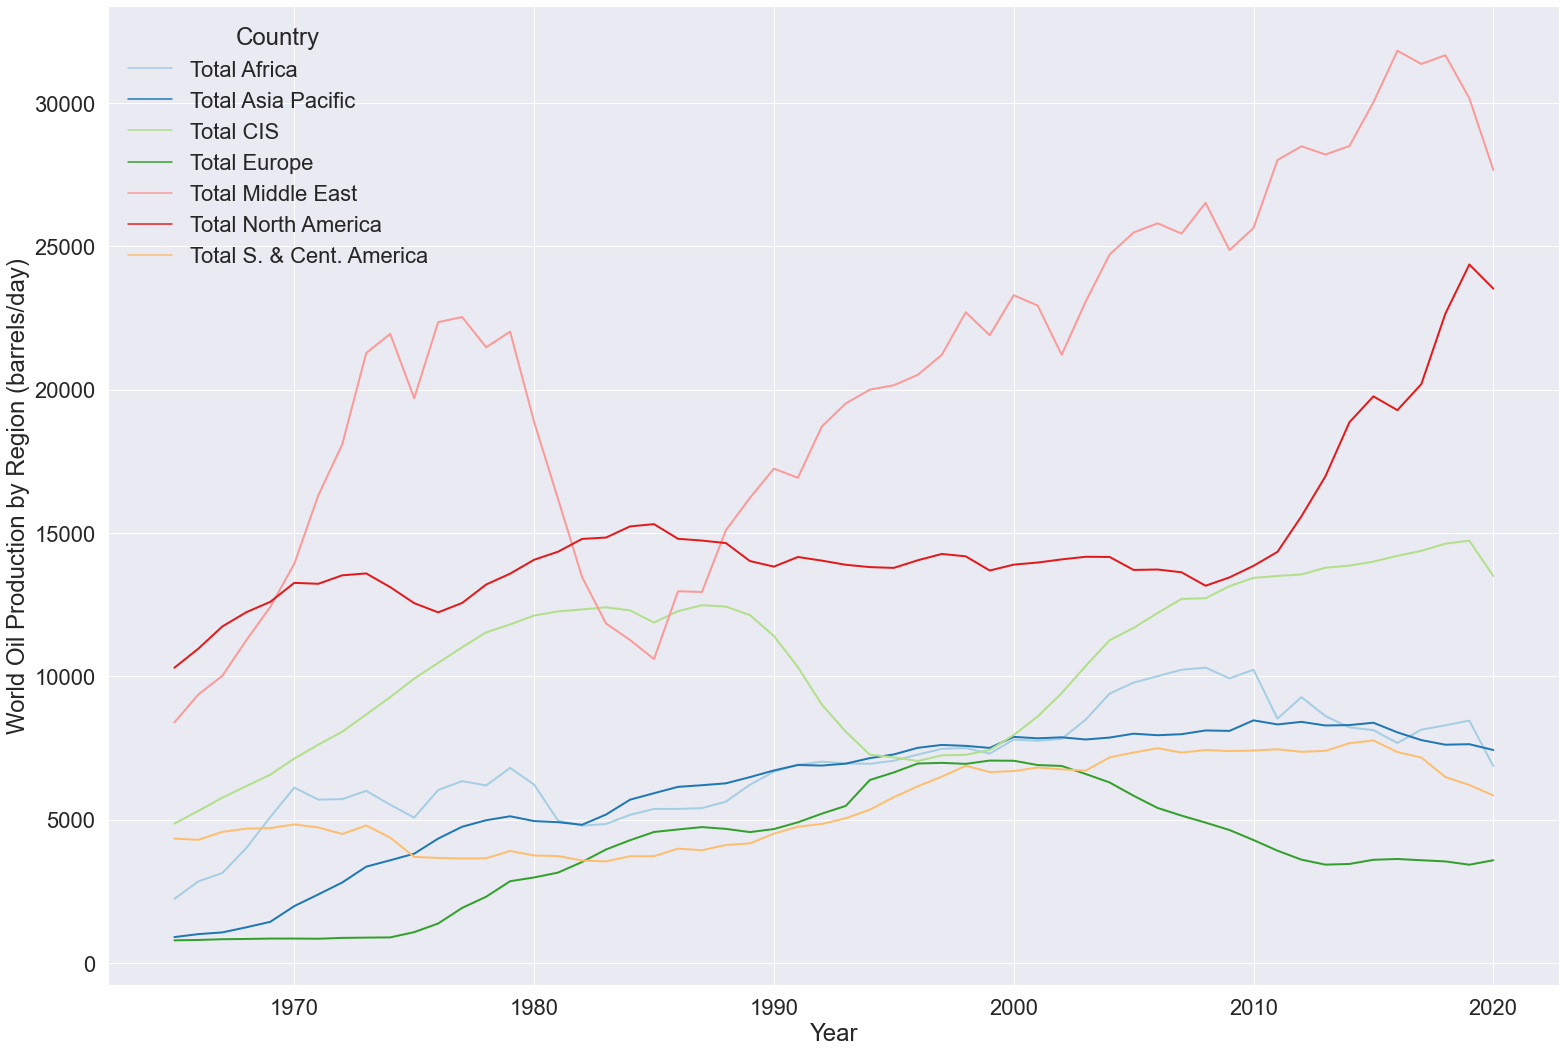

In [293]:
plt.figure(figsize=(26,18))
sns.set(font_scale = 2)
sns.lineplot(data=total_world_oilproduction_pivot_table.reset_index(), x='Year', y='Barrels_daily', hue='Country', palette='Paired', linewidth= 2.0)
plt.ylabel('World Oil Production by Region (barrels/day)')
plt.show()

### Oil Production by Country

In [275]:
tot_south = ds_oil_production[((ds_oil_production.Country == 'Total S. & Cent. America'))].index
tot_north = ds_oil_production[((ds_oil_production.Country == 'Total North America'))].index
tot_cis = ds_oil_production[((ds_oil_production.Country == 'Total CIS'))].index
tot_mid = ds_oil_production[((ds_oil_production.Country == 'Total Middle East'))].index
tot_afr = ds_oil_production[((ds_oil_production.Country == 'Total Africa'))].index
tot_asi = ds_oil_production[((ds_oil_production.Country == 'Total Asia Pacific'))].index
tot_eur = ds_oil_production[((ds_oil_production.Country == 'Total Europe'))].index
tot_world = ds_oil_production[((ds_oil_production.Country == 'Total World'))].index

country_oil_production = ds_oil_production.drop(tot_south)
country_oil_production = country_oil_production.drop(tot_north)
country_oil_production = country_oil_production.drop(tot_cis)
country_oil_production = country_oil_production.drop(tot_mid)
country_oil_production = country_oil_production.drop(tot_afr)
country_oil_production = country_oil_production.drop(tot_asi)
country_oil_production = country_oil_production.drop(tot_eur)
country_oil_production = country_oil_production.drop(tot_world)

In [276]:
country_oil_production

,Country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Canada,920.000000,1012.000000,1106.000000,1194.000000,1306.000000,1473.000000,1582.000000,1829.000000,2114.000000,...,3514.822066,3740.237677,4000.410965,4270.529903,4388.135578,4463.638847,4813.033351,5243.879959,5372.417032,5135.483143
2,Mexico,362.000000,370.000000,411.000000,439.000000,461.000000,487.000000,486.000000,506.000000,525.000000,...,2940.313380,2911.097981,2874.752731,2784.200879,2586.540847,2455.799498,2224.150160,2068.371143,1918.142825,1909.906457
3,US,9014.148000,9579.241000,10219.252000,10599.743000,10827.674000,11296.849000,11155.778000,11184.896000,10945.953000,...,7883.341589,8928.733541,10099.921000,11803.964342,12788.756014,12360.764169,13154.380658,15333.564712,17072.362726,16475.717273
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Argentina,275.673973,292.864110,318.631233,348.158470,361.532055,399.464658,431.538082,444.115847,433.635616,...,667.236399,656.656085,644.372528,637.593411,646.360166,609.630946,590.062751,591.322184,620.423017,600.426895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Malaysia,1.000000,1.000000,1.000000,4.000000,9.000000,18.000000,69.000000,93.000000,91.000000,...,659.344157,662.626225,627.016169,648.824388,696.323797,726.090513,718.087058,717.670435,662.670750,595.787900
66,Thailand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,429.005587,470.764136,465.578216,463.896176,480.666103,488.543764,486.339154,471.762906,470.679153,417.603754
67,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,315.765753,346.717568,346.468685,325.046027,351.565479,317.360929,284.371644,256.668219,236.444932,207.073128
68,Other Asia Pacific,35.113973,34.085479,31.085479,35.113661,36.427397,39.505315,42.417534,44.299672,47.056027,...,302.316626,291.335352,274.443853,296.438157,297.792821,280.651929,273.032873,233.591848,230.990108,210.252537


In [277]:
ds_oil_production_melt = country_oil_production.melt(id_vars=['Country'], var_name='Year', value_name='Barrels_daily')
ds_oil_production_melt

,Country,Year,Barrels_daily
0,Canada,1965,920.000000
1,Mexico,1965,362.000000
2,US,1965,9014.148000
3,NaN,1965,NaN
4,Argentina,1965,275.673973
...,...,...,...
3523,Malaysia,2020,595.787900
3524,Thailand,2020,417.603754
3525,Vietnam,2020,207.073128
3526,Other Asia Pacific,2020,210.252537


In [278]:
pivot_oil_prod = ds_oil_production_melt.pivot_table(index=['Country', 'Year'])
pivot_oil_prod.head()

Barrels_daily
Country Year               
Algeria 1965     569.943836
        1966     733.593151
        1967     842.664384
        1968     922.495082
        1969     969.331507

In [279]:
pivot_oil_prod.dropna()

Barrels_daily
Country Year               
Algeria 1965     569.943836
        1966     733.593151
        1967     842.664384
        1968     922.495082
        1969     969.331507
...                     ...
Yemen   2016      42.576511
        2017      71.013699
        2018      94.156115
        2019      94.649315
        2020      94.573770

[2784 rows x 1 columns]

In [280]:
top_10_oil_production = pivot_oil_prod.nlargest(10, ['Barrels_daily'])
top_10_oil_production

Barrels_daily
Country      Year               
US           2019   17072.362726
             2020   16475.717273
             2018   15333.564712
             2017   13154.380658
             2015   12788.756014
Saudi Arabia 2016   12406.047608
USSR         1983   12403.434247
US           2016   12360.764169
USSR         1982   12329.785479
             1984   12296.677049

In [281]:
top_20_oil_production = pivot_oil_prod.nlargest(20, ['Barrels_daily'])
top_20_oil_production

Barrels_daily
Country            Year               
US                 2019   17072.362726
                   2020   16475.717273
                   2018   15333.564712
                   2017   13154.380658
                   2015   12788.756014
Saudi Arabia       2016   12406.047608
USSR               1983   12403.434247
US                 2016   12360.764169
USSR               1982   12329.785479
                   1984   12296.677049
Saudi Arabia       2018   12261.333342
USSR               1981   12260.252877
                   1980   12116.414481
Saudi Arabia       2015   11997.937984
                   2017   11892.198262
                   2019   11832.319243
USSR               1979   11805.424658
US                 2014   11803.964342
Russian Federation 2019   11679.000289
Saudi Arabia       2012   11621.794283

## Oil Proved Reserves

Again, this data comes from the [Statistical Review of World Energy](https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy/downloads.html) by BP. Note:
Source - The estimates in this table have been compiled using a combination of primary official sources, third-party data from the OPEC Secretariat, World Oil, Oil & Gas Journal and Chinese reserves based on official data and information in the public domain. Canadian oil sands 'under active development' are an official estimate. Venezuelan Orinoco Belt reserves are based on the OPEC Secretariat and government announcements. Reserves and R/P ratio for Canada includes Canadian oil sands. Reserves and R/P ratio for Venezuela includes the Orinoco Belt.  Saudi Arabia's oil reserves include NGLs from 2017.

**Total proved reserves of oil - Generally taken to be those quantities that geological and engineering information indicates with reasonable certainty can be recovered in the future from known reservoirs under existing economic and operating conditions. The data series for total proved oil reserves does not necessarily meet the definitions, guidelines and practices used for determining proved reserves at company level, for instance as published by the US Securities and Exchange Commission, Reserves-to-production (R/P) ratio - If the reserves remaining at the end of any year are divided by the production in that year, the result is the length of time that those remaining reserves would last if production were to continue at that rate.**
- Reserves include gas condensate and natural gas liquids (NGLs) as well as crude oil. 
- Shares of total and R/P ratios are calculated using thousand million barrels figures.

In [319]:
oil_reserves = pd.read_excel(xls, 'Oil - Proved reserves', header=[4])
oil_reserves.head()

,Unnamed: 0,barrels,barrels.1,barrels.2,barrels.3,tonnes,of total,ratio,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Canada,181.503697,174.848021,169.12491,168.087611,27.059977,0.097028,89.427957,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mexico,24.631280,10.419600,6.06588,6.065880,0.864085,0.003501,8.67762,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US,30.390000,34.990000,68.75700,68.757000,8.202768,0.039690,11.402275,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Total North America,236.524977,220.257621,243.94779,242.910491,36.126830,0.140219,28.216779,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [320]:
oil_reserves = oil_reserves.drop(0)
oil_reserves

,Unnamed: 0,barrels,barrels.1,barrels.2,barrels.3,tonnes,of total,ratio,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
1,Canada,181.503697,174.848021,169.12491,168.087611,27.059977,0.097028,89.427957,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mexico,24.631280,10.419600,6.06588,6.065880,0.864085,0.003501,8.67762,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US,30.390000,34.990000,68.75700,68.757000,8.202768,0.039690,11.402275,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Total North America,236.524977,220.257621,243.94779,242.910491,36.126830,0.140219,28.216779,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,nor does it necessarily represent BP’s view of...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,Reserves-to-production (R/P) ratio - If the re...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,that those remaining reserves would last if pr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,Reserves include gas condensate and natural ga...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [321]:
oil_reserves.rename({'Unnamed: 0':'Country'}, axis=1, inplace=True)
oil_reserves.head()

,Country,barrels,barrels.1,barrels.2,barrels.3,tonnes,of total,ratio,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
1,Canada,181.503697,174.848021,169.12491,168.087611,27.059977,0.097028,89.427957,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mexico,24.631280,10.419600,6.06588,6.065880,0.864085,0.003501,8.67762,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US,30.390000,34.990000,68.75700,68.757000,8.202768,0.039690,11.402275,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Total North America,236.524977,220.257621,243.94779,242.910491,36.126830,0.140219,28.216779,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [322]:
ind = oil_reserves[((oil_reserves.Country == 'Total World'))].index
ind

Int64Index([70], dtype='int64')

In [324]:
oil_reserves = oil_reserves.iloc[0:69]
oil_reserves

,Country,barrels,barrels.1,barrels.2,barrels.3,tonnes,of total,ratio,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
1,Canada,181.503697,174.848021,169.124910,168.087611,27.059977,0.097028,89.427957,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mexico,24.631280,10.419600,6.065880,6.065880,0.864085,0.003501,8.67762,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US,30.390000,34.990000,68.757000,68.757000,8.202768,0.039690,11.402275,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Total North America,236.524977,220.257621,243.947790,242.910491,36.126830,0.140219,28.216779,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Thailand,0.515000,0.442000,0.252750,0.252750,0.030460,0.000146,1.653658,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,Vietnam,1.950000,4.400000,4.400000,4.400000,0.594595,0.002540,58.056098,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,Other Asia Pacific,1.307612,1.107442,1.366695,1.337779,0.174465,0.000772,17.384497,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Total Asia Pacific,37.672134,47.783719,45.348929,45.158721,6.052880,0.026068,16.61711,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [325]:
oil_reserves.columns

Index(['Country', 'barrels', 'barrels.1', 'barrels.2', 'barrels.3', 'tonnes',
       'of total', 'ratio', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [326]:
oil_reserves = oil_reserves[['Country', 'barrels', 'barrels.1', 'barrels.2', 'barrels.3', 'tonnes', 'of total', 'ratio']]
oil_reserves

,Country,barrels,barrels.1,barrels.2,barrels.3,tonnes,of total,ratio
1,Canada,181.503697,174.848021,169.124910,168.087611,27.059977,0.097028,89.427957
2,Mexico,24.631280,10.419600,6.065880,6.065880,0.864085,0.003501,8.67762
3,US,30.390000,34.990000,68.757000,68.757000,8.202768,0.039690,11.402275
4,Total North America,236.524977,220.257621,243.947790,242.910491,36.126830,0.140219,28.216779
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
65,Thailand,0.515000,0.442000,0.252750,0.252750,0.030460,0.000146,1.653658
66,Vietnam,1.950000,4.400000,4.400000,4.400000,0.594595,0.002540,58.056098
67,Other Asia Pacific,1.307612,1.107442,1.366695,1.337779,0.174465,0.000772,17.384497
68,Total Asia Pacific,37.672134,47.783719,45.348929,45.158721,6.052880,0.026068,16.61711


In [327]:
oil_reserves.rename({'barrels':'Thousand million barrels at end year 2000'}, axis=1, inplace=True)
oil_reserves.rename({'barrels.1':'Thousand million barrels at end year 2010'}, axis=1, inplace=True)
oil_reserves.rename({'barrels.2':'Thousand million barrels at end year 2019'}, axis=1, inplace=True)
oil_reserves.rename({'barrels.3':'Thousand million barrels at end year 2020'}, axis=1, inplace=True)
oil_reserves.rename({'tonnes':'Thousand million tonnes at end year 2020'}, axis=1, inplace=True)
oil_reserves.rename({'of total':'Share of total'}, axis=1, inplace=True)
oil_reserves.rename({'ratio':'R/P ratio'}, axis=1, inplace=True)
oil_reserves.head()

D:\User\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Country,Thousand million barrels at end year 2000,Thousand million barrels at end year 2010,Thousand million barrels at end year 2019,Thousand million barrels at end year 2020,Thousand million tonnes at end year 2020,Share of total,R/P ratio
1,Canada,181.503697,174.848021,169.12491,168.087611,27.059977,0.097028,89.427957
2,Mexico,24.631280,10.419600,6.06588,6.065880,0.864085,0.003501,8.67762
3,US,30.390000,34.990000,68.75700,68.757000,8.202768,0.039690,11.402275
4,Total North America,236.524977,220.257621,243.94779,242.910491,36.126830,0.140219,28.216779
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [328]:
oil_reserves_barells = oil_reserves[['Country','Thousand million barrels at end year 2000','Thousand million barrels at end year 2010','Thousand million barrels at end year 2019', 'Thousand million barrels at end year 2020']]
oil_reserves_barells

,Country,Thousand million barrels at end year 2000,Thousand million barrels at end year 2010,Thousand million barrels at end year 2019,Thousand million barrels at end year 2020
1,Canada,181.503697,174.848021,169.124910,168.087611
2,Mexico,24.631280,10.419600,6.065880,6.065880
3,US,30.390000,34.990000,68.757000,68.757000
4,Total North America,236.524977,220.257621,243.947790,242.910491
5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
65,Thailand,0.515000,0.442000,0.252750,0.252750
66,Vietnam,1.950000,4.400000,4.400000,4.400000
67,Other Asia Pacific,1.307612,1.107442,1.366695,1.337779
68,Total Asia Pacific,37.672134,47.783719,45.348929,45.158721


### Oil Reserves by country

In [329]:
tot_south = oil_reserves_barells[((oil_reserves_barells.Country == 'Total S. & Cent. America'))].index
tot_north = oil_reserves_barells[((oil_reserves_barells.Country == 'Total North America'))].index
tot_cis = oil_reserves_barells[((oil_reserves_barells.Country == 'Total CIS'))].index
tot_mid = oil_reserves_barells[((oil_reserves_barells.Country == 'Total Middle East'))].index
tot_afr = oil_reserves_barells[((oil_reserves_barells.Country == 'Total Africa'))].index
tot_asi = oil_reserves_barells[((oil_reserves_barells.Country == 'Total Asia Pacific'))].index
tot_eur = oil_reserves_barells[((oil_reserves_barells.Country == 'Total Europe'))].index
tot_world = oil_reserves_barells[((oil_reserves_barells.Country == 'Total World'))].index

country_oil_reserves_barells = oil_reserves_barells.drop(tot_south)
country_oil_reserves_barells = country_oil_reserves_barells.drop(tot_north)
country_oil_reserves_barells = country_oil_reserves_barells.drop(tot_cis)
country_oil_reserves_barells = country_oil_reserves_barells.drop(tot_mid)
country_oil_reserves_barells = country_oil_reserves_barells.drop(tot_afr)
country_oil_reserves_barells = country_oil_reserves_barells.drop(tot_asi)
country_oil_reserves_barells = country_oil_reserves_barells.drop(tot_eur)
country_oil_reserves_barells = country_oil_reserves_barells.drop(tot_world)

In [333]:
country_oil_reserves_barells = country_oil_reserves_barells.dropna()
country_oil_reserves_barells

,Country,Thousand million barrels at end year 2000,Thousand million barrels at end year 2010,Thousand million barrels at end year 2019,Thousand million barrels at end year 2020
1,Canada,181.503697,174.848021,169.124910,168.087611
2,Mexico,24.631280,10.419600,6.065880,6.065880
3,US,30.390000,34.990000,68.757000,68.757000
6,Argentina,2.973703,2.524152,2.482707,2.482707
7,Brazil,8.464488,14.246330,12.714600,11.925011
8,Colombia,1.971900,1.900000,1.960000,2.036000
9,Ecuador,2.668168,2.067450,1.302547,1.302547
10,Peru,0.905620,1.240000,0.803177,0.746346
11,Trinidad & Tobago,0.851070,0.830000,0.242982,0.242982
12,Venezuela,76.848000,296.501000,303.805745,303.805745


In [334]:
country_oil_reserves_indexed = country_oil_reserves_barells.set_index('Country')
country_oil_reserves_indexed

,Thousand million barrels at end year 2000,Thousand million barrels at end year 2010,Thousand million barrels at end year 2019,Thousand million barrels at end year 2020
Country,,,,
Canada,181.503697,174.848021,169.124910,168.087611
Mexico,24.631280,10.419600,6.065880,6.065880
US,30.390000,34.990000,68.757000,68.757000
Argentina,2.973703,2.524152,2.482707,2.482707
Brazil,8.464488,14.246330,12.714600,11.925011
Colombia,1.971900,1.900000,1.960000,2.036000
Ecuador,2.668168,2.067450,1.302547,1.302547
Peru,0.905620,1.240000,0.803177,0.746346
Trinidad & Tobago,0.851070,0.830000,0.242982,0.242982


### Top 10 countries with number of oil reserves end of year 2000

In [335]:
top_10_countries_no_oil_reserves_2000 = country_oil_reserves_indexed.nlargest(10, ['Thousand million barrels at end year 2000'])
top_10_countries_no_oil_reserves_2000

,Thousand million barrels at end year 2000,Thousand million barrels at end year 2010,Thousand million barrels at end year 2019,Thousand million barrels at end year 2020
Country,,,,
Saudi Arabia,262.766000,264.516000,297.578000,297.527000
Canada,181.503697,174.848021,169.124910,168.087611
Iraq,112.500000,115.000000,145.019000,145.019000
Russian Federation,112.112023,105.800352,107.804239,107.804239
Iran,99.530000,151.170000,157.800000,157.800000
United Arab Emirates,97.800000,97.800000,97.800000,97.800000
Kuwait,96.500000,101.500000,101.500000,101.500000
Venezuela,76.848000,296.501000,303.805745,303.805745
Libya,36.000000,47.097000,48.363000,48.363000


### Top 10 countries with number of oil reserves end of year 2020

In [336]:
top_10_countries_no_oil_reserves_2020 = country_oil_reserves_indexed.nlargest(10, ['Thousand million barrels at end year 2020'])
top_10_countries_no_oil_reserves_2020

,Thousand million barrels at end year 2000,Thousand million barrels at end year 2010,Thousand million barrels at end year 2019,Thousand million barrels at end year 2020
Country,,,,
Venezuela,76.848000,296.501000,303.805745,303.805745
Saudi Arabia,262.766000,264.516000,297.578000,297.527000
Canada,181.503697,174.848021,169.124910,168.087611
Iran,99.530000,151.170000,157.800000,157.800000
Iraq,112.500000,115.000000,145.019000,145.019000
Russian Federation,112.112023,105.800352,107.804239,107.804239
Kuwait,96.500000,101.500000,101.500000,101.500000
United Arab Emirates,97.800000,97.800000,97.800000,97.800000
US,30.390000,34.990000,68.757000,68.757000


In [339]:
# Max no. oil reserves in 2010
country_oil_reserves_indexed.loc[country_oil_reserves_indexed['Thousand million barrels at end year 2010'].idxmax()]

Thousand million barrels at end year 2000     76.848000
Thousand million barrels at end year 2010    296.501000
Thousand million barrels at end year 2019    303.805745
Thousand million barrels at end year 2020    303.805745
Name: Venezuela, dtype: float64

In [340]:
# Max no. oil reserves in 2019
country_oil_reserves_indexed.loc[country_oil_reserves_indexed['Thousand million barrels at end year 2019'].idxmax()]

Thousand million barrels at end year 2000     76.848000
Thousand million barrels at end year 2010    296.501000
Thousand million barrels at end year 2019    303.805745
Thousand million barrels at end year 2020    303.805745
Name: Venezuela, dtype: float64

## OECD

OECD stands for Organisation of Economic Cooperation and Development. According to Wikipedia, it is an intergovernmental economic organisation with 38 member countries, founded in 1961 to stimulate economic progress and world trade. Those countries consist of the U.S., much of Europe, and other world-leading, advanced countries. 

### Natural Gas

In [282]:
natural_gas_data = power_plant_data[((power_plant_data.primary_fuel == 'Gas'))]
natural_gas_data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
6,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.0,34.5638,69.1134,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
19,DZA,Algeria,Ain Djasser,WRI1023776,520.0,35.8665,6.0262,Gas,Oil,NaN,...,NaN,NaN,NaN,NaN,2171.28,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
25,DZA,Algeria,Annaba,WRI1023795,71.0,36.8924,7.7634,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,296.46,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
27,DZA,Algeria,Arbaa,WRI1023777,560.0,36.5988,3.1375,Gas,Oil,NaN,...,NaN,NaN,NaN,NaN,2338.30,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
29,DZA,Algeria,Boufarik 1,WRI1023792,100.0,36.5914,2.9223,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,417.55,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


In [283]:
# Making separate dataset for capacity_mw; will use later for combined table
natural_gas_subset = natural_gas_data[['country_long','capacity_mw']]

In [284]:
natural_gas_data = natural_gas_data.drop(columns='other_fuel1')
natural_gas_data = natural_gas_data.drop(columns='other_fuel2')
natural_gas_data = natural_gas_data.drop(columns='other_fuel3')

In [285]:
est_gen_gwh_natural_gas = natural_gas_data[['country_long','estimated_generation_gwh_2017']]
est_gen_gwh_natural_gas

,country_long,estimated_generation_gwh_2017
6,Afghanistan,NaN
19,Algeria,2171.28
25,Algeria,296.46
27,Algeria,2338.30
29,Algeria,417.55
...,...,...
34841,Vietnam,7049.48
34842,Vietnam,5767.04
34843,Vietnam,5767.04
34844,Vietnam,3603.42


In [286]:
# eliminate NaN's
est_gen_gwh_natural_gas = est_gen_gwh_natural_gas[est_gen_gwh_natural_gas['estimated_generation_gwh_2017'].notna()]
est_gen_gwh_natural_gas = est_gen_gwh_natural_gas[est_gen_gwh_natural_gas['estimated_generation_gwh_2017'] != 'nan']
est_gen_gwh_natural_gas

,country_long,estimated_generation_gwh_2017
19,Algeria,2171.28
25,Algeria,296.46
27,Algeria,2338.30
29,Algeria,417.55
30,Algeria,1878.99
...,...,...
34841,Vietnam,7049.48
34842,Vietnam,5767.04
34843,Vietnam,5767.04
34844,Vietnam,3603.42


In [287]:
est_gen_gwh_natural_gas_avg = est_gen_gwh_natural_gas.groupby('country_long').mean().reset_index()
est_gen_gwh_natural_gas_avg

,country_long,estimated_generation_gwh_2017
0,Algeria,2044.528065
1,Angola,0.000000
2,Argentina,1281.531404
3,Armenia,3892.626667
4,Australia,414.181940
...,...,...
87,United States of America,1059.952800
88,Uzbekistan,7980.733333
89,Venezuela,970.082647
90,Vietnam,6760.998889


#### Top 10 Countries with highest estimated generation gwh for 2017 - Natural Gas

In [288]:
top_gwh_2017_natural_gas = est_gen_gwh_natural_gas_avg.sort_values(['country_long', 'estimated_generation_gwh_2017'], ascending=False).groupby('country_long').head(10)
top_gwh_2017_natural_gas

,country_long,estimated_generation_gwh_2017
91,Yemen,1422.820000
90,Vietnam,6760.998889
89,Venezuela,970.082647
88,Uzbekistan,7980.733333
87,United States of America,1059.952800
...,...,...
4,Australia,414.181940
3,Armenia,3892.626667
2,Argentina,1281.531404
1,Angola,0.000000
